<img src="/Users/marenabele/Desktop/Machinelles Lernen/Bilder/NAK_Logo.png" title="NAK Logo"/>

# Traffic Sign Recognition - Ein Vergleich verschiedener Machine-Learning-Modelle und Ansätze für die Image Classification 

#### Hausarbeit <p>

#### Nordakademie Hochschule der Wirtschaft <p>
#### für die Prüfung zum Master of Science des Studiengangs Applied Data Science
<br>
<br>

##### Vorgelegt von: Maren Abele | 12598
##### Vorgelegt von: Maurice Osterhof | 12821
##### Vorgelegt von: Moritz Scheele | 12606
##### Vorgelegt von: Justin Sorgatz | 12607
<br>
<br>

##### Bearbeitungszeitraum: 19.08.2023 – 10.09.2023
##### Gutachter: Uwe Neuhaus
##### Hamburg, 10.09.2023
***


## Disclaimer
Die vorliegende Hausarbeit ist das Ergebnis einer Gruppenarbeit und sollte entsprechend benotet
werden. Während für die einzelnen Überthemen Hauptverantwortliche benannt sind, haben wir viel
zusammengearbeitet und voneinander beziehungsweise hauptsächlich von dem "Charlie" im Team -
Moritz Scheele - gelernt. Nach Entwicklung des Codes haben wir ihn uns gegenseitig erklärt und
unsere weitere Arbeit darauf aufgebaut. Um zum finalen Ergebnis der Hausarbeit zu gelangen, haben
wir uns viel ausgetauscht und die Dokumentation untereinander aufgeteilt. Daher bitten wir Sie, bei
der abschließenden Benotung keine Unterschiede zwischen den Gruppenmitgliedern zu machen.
Wenn Sie jedoch einen Anlass dafür sehen, nach den vier Überthemen zu unterscheiden, bitten wir
Sie, Moritz Scheele die beste Note zu geben, da er uns anderen drei viel geholfen und vor allem viel
Wissen mit uns geteilt hat.
***

In der folgenden Hausarbeit wird das generische Maskulinum verwendet, um eine bessere Lesbarkeit
zu gewährleisten. Diese Form bezieht sich dabei immer auch auf weibliche und anderweitige
Geschlechteridentitäten.
***

## Einführung in das Jupyter Notebook
Um den gesamten Code in diesem Jupyter-Notebook durchführen zu können, werden einige Python
Libraries und Packages benötigt. Diese sollten vorher in einer Python-Umgebung installiert werden.
Damit keine Fehlermeldungen auftreten und eine reibungslose Durchführung möglich ist, wird
zunächst darum gebeten, die erste Codezeile durchzuführen und gegebenenfalls fehlende Libraries
und Packages vorab zu installieren, bis die erste Zeile ohne Fehlermeldungen ausgeführt werden
kann.

In [ ]:
# Hier das große Import Statement

***

## Laden von Daten
Die für das Jupyter-Notebook zugrunde liegenden Daten und Bilder können über das [GitHub
Repository](http://url "GitHub Repository") heruntergeladen werden. Unter der Voraussetzung, dass
nach dem Herunterladen keine Änderungen vorgenommen werden, ist eine Durchführung ohne
Fehlermeldungen möglich. Sollten dennoch Probleme auftreten, sind die Pfade zu überprüfen und
gegebenenfalls anzupassen. Importierte Bilder können entweder nach einer Anpassung der Pfade oder über den
Bilder-Ordner des Repositories eingesehen werden.
Außerdem kann der Datensatz über [Kaggle](https://www.kaggle.com/datasets/harbhajansingh21/german-traffic-sign-dataset) heruntergeladen werden. In diesem fehlen allerdings
die in das Jupyter-Notebook importierten Bilder.
***

# Inhaltsverzeichnis
<a href="#Einleitung">1. Einleitung</a>

<a id="Einleitung"></a>

# 1. Einleitung
Die Automobilindustrie gilt als einer der wichtigsten Industrien in Deutschland. 2022 wurde ein
Umsatz von 506.2 Milliarden Euro erwirtschaftet (Statista Research Department, 2023). Die Industrie
investiert in Forschung und Entwicklung neuer Softwaresysteme und KI-Anwendungen. KIAnwendungen
spielen eine entscheidende Rolle für die Entwicklung von autonomen Fahrzeugen.
Assistenzsysteme wie Tempomaten oder für die Erkennung von Verkehrsschildern sind bereits
etabliert (Delican et al., 2020; Fraunhofer-Institut für Kognitive Systeme IKS, o. D.; Koch, 2019).
Allerdings weisen insbesondere Systeme für die Erkennung von Verkehrsschildern laut einem Test
vom April 2019 noch große Defizite hinsichtlich Zuverlässigkeit auf (Koch, 2019). Dabei spielt die
Zuverlässigkeit solcher Systeme eine entscheidende Rolle (Fraunhofer-Institut für Kognitive Systeme
IKS, o. D.).
In der folgenden Hausarbeit wird mit Hilfe von verschiedenen Maschine-Learning-Ansätzen eine
Image Classification von Verkehrsschildern durchgeführt. Ziel ist es, einen Vergleich dieser Ansätze zu
ziehen. Zu diesen Ansätzen zählen das Upsampling der Trainingsdaten, traditionelle Maschine-
Learning-Ansätze, die Verwendung von CNN, Hyperparameter Tuning und Transfer Learning.
Am Ende der Hausarbeit wird ein Graphical User Interface erstellt, in dem eine intuitive Anwendung
der Klassifizierung durch Endnutzer möglich ist.
***

<a id="Domänverständnis"></a>

# 2. Domänverständnis
Während der Arbeit mit Daten ist der Aufbau eines Domänenverständnisses unerlässlich. Dies
erfordert eine detailgenaue Dokumentation der Daten sowie ein Grundverständnis des
Anwendungskontextes. Fehlende Kontextinformationen können zu einer nicht wahrheitsgemäßen
Interpretation der Daten führen. Außerdem hilft es der Nachvollziehbarkeit der Daten, sodass auch
Dritte mit den Daten arbeiten und sich austauschen können (Böker, 2023). Für das Verständnis des
Kontextes dieser Arbeit werden im Folgenden einige grundlegende Fakten der Automobilindustrie
dargestellt. Außerdem wird auf den verwendeten Datensatz eingegangen.

<a id="Automobilindustrie"></a>

### 2.1 Automobilindustrie
In Deutschland zählt die Automobilindustrie zu den wichtigsten Industriezweigen. Auch weltweit gilt
Deutschland als einer der bedeutendsten Standorte für diese Industrie. 2022 erwirtschafte die
deutsche Automobilindustrie einen Umsatz von 506.2 Milliarden Euro. Der Großteil dieses Umsatzes
wurde im Ausland erzielt. Mit 774.300 Beschäftigten ist die Automobilindustrie auch als Arbeitgeber
in Deutschland essenziell. Die zunehmende Elektromobilität bringt jedoch auch neue
Herausforderungen mit sich (Statista Research Department, 2023).
Aber auch der Fortschritt mit Anwendungen mit Künstlicher Intelligenz zwingt die Industrie zum
Handeln. Um Wettbewerbsvorteile zu halten, bieten viele Hersteller den Kunden neue Dienste wie
zum Beispiel vernetzte Erweiterungen für Daheim an. Investitionen in datengesteuerte
Softwarelösungen dienen sowohl der Bedienung immer weiter steigender Erwartungen der Kunden
als auch auch der Förderung der Mobilität und Fertigung der Fahrzeuge. Die meisten
Automobilhersteller investieren auch in Maschine Learning und Deep-Learning-Anwendungen. Durch
diese Innovationen sollen die Bereiche von autonomen und vernetzten Fahrzeugen forciert werden.
Autonomes Fahren und KI-Anwendungen sind stark miteinander verknüpft (Delican et al., 2020).

<a id="Autonomesfahren"></a>

### 2.2 Autonomes Fahren
Autonomes Fahren beziehungsweise selbstfahrende Autos gelten als wegweisende Technologie für die Automobilindustrie. Weite Teile von modernen Autos sind schon heute automatisiert. So gibt es seit mehreren Jahren beispielsweise Fahrer-Assistenzsysteme. In Zukunft sollen Autos komplett selbst fahren. Die Society of Automotive Engineers hat das autonome Fahren in fünf Level unterteilt. Von Level 1 mit Assistenzsystemen wie Tempomaten, über Level 3 mit einer Automation für z. B. für eine automatische Steuerung von Überhol-, Beschleunigungs- und Bremsvorgängen bis hin zu Level 5. Bei Level 5 „autonom“ fährt das Fahrzeug komplett allein und die Fahrer können nicht mehr in die Situation eingreifen. Auch komplexe Fahrsituationen kann das System bewältigen. In Deutschland wurde 2022 das erste Auto mit einem Level 3 „hohe Automation“ zugelassen. Allerdings darf das
autonome System nur unter bestimmten Voraussetzungen verwendet werden (Fraunhofer-Institut für
Kognitive Systeme IKS, o. D.). <p>
Für Fahrzeuge ab Level 3 „hohe Automation“ müssen einige technische Voraussetzungen erfüllt sein.
Darunter fällt zum einen die maschinelle Wahrnehmung. Dabei nehmen Kameras und Sensoren die
Umgebung in Echtzeit auf. Karten und GPS-Angaben bieten zusätzliche Informationen. Alle
gesammelten Daten werden zusammenführt und durch künstliche Intelligenz ausgewertet. Das
Ergebnis als maschinelle Wahrnehmung der Umgebung ist die sogenannte Perzeption. Außerdem ist
das wahrheitsgemäße Verstehen bestimmter Situationen eine weitere Voraussetzung. Aus der
Perzeption wird mit Hilfe von KI ein 3D-Modell der Umgebung konstruiert. Dadurch werden
Situationen errechnet und Vorhersagen getroffen. Daraus resultierend ergibt sich die nächste
Voraussetzung, die Bahnführung. Das Fahrzeug errechnet und führt die nächste Handlung selbst aus. <p>
Das Autonome Fahren wird nicht nur den Personenverkehr, sondern auch andere Wirtschaftszweige
wie beispielsweise Landwirtschaft beeinflussen (Fraunhofer-Institut für Kognitive Systeme IKS, o. D.).<p>
Ein entscheidender Aspekt für das autonome Fahren ist die Verlässlichkeit der Systeme. Da es um
Meschenleben geht, müssen die Fahrzeuge fehlerfrei funktionieren, damit es sein komplettes
Potential ausgeschöpft werden kann.


<a id="Verkehrsschilder"></a>

### 2.3 Verkehrsschilder
In Deutschland stehen an den Straßen mehr als 20 Millionen Verkehrsschilder. Außerdem ist
Deutschland mit den über 600 verschiedenen Verkehrszeichen der Straßenverkehrsordnung (StVO)
weltweit vorne (Wenig, 2021). Der folgende Abschnitt geht kurz auf die Begrifflichkeiten
„Verkehrsschild“ und „Verkehrszeichen“ ein. Bei einem Verkehrsschild handelt es sich, wie im Namen
bereits enthalten, nur um Schilder. Auf diesen Schildern werden Informationen zur Beeinflussung des
Straßenverkehrs übermittelt. Bei Verkehrszeichen handelt es sich nicht immer um Schilder. So sind
Fahrbahnmarkierungen Verkehrszeichen, die auf die Fahrbahn gemalt wurden (Düring, o. J.).<p>
Für die Informationsvermittlung an menschliche Verkehrsteilnehmer werden Verkehrszeichen und
-schilder verwendet. Auch selbstfahrende Autos können diese erkennen, jedoch kann dies nicht ganz
sicher sein. So könnten Schilder, die für eine Querstraße gedacht sind als relevant angesehen werden.
Auch könnten Schilder unterschiedliche Winkel, Drehungen und Neigungen aufweisen. Zudem sind
bösartige Angriffe und Manipulationen der Algorithmen möglich. Außerdem ist eine funkbasierte
Kommunikation der selbstfahrenden Autos erforderlich. Eine Montage von Sendern an allen Straßen
wäre jedoch sehr teuer. Deshalb gibt es in den letzten Jahren immer wieder neue Ansätze, unter
anderem von dem Startup „Connected Wise“ aus Florida. Die von dem Startup entwickelten Schilder
enthalten kryptographisch gesicherte Kennzahlen. Diese enthalten Merkmale, die auf Einträge in
einer Datenbank verweisen. Auch bei signifikanten Verschmutzen der Kamera oder Schilder ist das
System noch funktionstüchtig (Sokolov, 2019).<p>
<img src="/Users/marenabele/Desktop/Machinelles Lernen/Bilder/Connected_Wise.png" title="Connected_Wise"/> <p>
Quelle: Sokolov, 2019 <p>
Auch in Deutschland wird an neuen Autoschildern für autonome Fahrzeuge geforscht. Im Jahr 2021
wurden neue Verkehrsschilder vom Bundesministerium für Verkehr und digitale Infrastruktur (BMVI)
auf den Autobahnen A9 und A93 getestet. Diese schwarz-weißen Schilder haben keinerlei Ähnlichkeit
mit den gängigen Verkehrsschildern und müssen von den menschlichen Verkehrsteilnehmern nicht
beachtet werden. Diese Schilder dienen der exakten Standortbestimmung von autonomen
Fahrzeugen und erfassen zudem die Umgebung (Wenig, 2021). <p>
<img src="/Users/marenabele/Desktop/Machinelles Lernen/Bilder/Neues_Schild.jpg" title="Neues Verkehrsschild"/> 
Quelle: Robert Schmiegelt/imago-images.de<p>
In modernen Autos gibt es eingebaute Verkehrsschild-Erkennungen als Assistenzsystem für die Fahrer.
Diese sollen den Fahrer mit den vielen Verkehrsschildern unterstützen. Hierbei nutzen die
Autohersteller Videokameras, die die Schilder erfassen und auswerten. Die Autozeitung hat im April
2019 einen Test dieses Assistenzsystems in 12 unterschiedlichen Autos durchgeführt. Diese Autos
waren von verschiedenen Herstellern und in unterschiedlichen Preissegmenten. Keines der Autos hat
den Parkour komplett fehlerfrei absolviert. Die Zuverlässigkeit der Systeme lag bei den getesteten
Autos zwischen 32,50% und 95,00%, wobei 11 der 12 Autos über 77,50% der Schilder erkannten.
Dennoch besteht bei den Systemen noch Verbesserungsbedarf (Koch, 2019).<p>
Solche Assistenzsysteme bieten eine Grundlage für das autonome Fahren (Koch, 2019). Auch wenn
andere Möglichkeiten und Ansätze existieren, werden Verkehrsschilder von Bedeutung sein bei der
weiteren Entwicklung von autonomen Fahrzeugen. An diesem Punkt setzt diese Hausarbeit an und es
soll mit verschiedenen Machine-Learning-Ansätzen eine Image Classification für die Erkennung von
Verkehrsschildern durchgeführt werden, um ein möglichst gutes Ergebnis zu erzielen.


<a id="Datensatz"></a>

### 2.4 Datensatz
Der Datensatz, der für diese Hausarbeit herangezogen wird, wurde über Kaggle gefunden. Dieser Datensatz ist unter [hier]( https://www.kaggle.com/datasetsharbhajansingh21/german-traffic-signdataset) zu finden und heißt "German Traffic Sign Dataset“ von Harbhajan Singh.
Dieser hat an der Universität von Windsor (CAN) ein AI-Studium abgeschlossen. Stand 10.09.2023
wurde der Datensatz vor zwei Monaten aktualisiert. Außerdem gibt es ein Notebook, das ebenfalls
von Harbhajan Singh erstellt wurde. <p>
Der Datensatz besteht aus einer CSV- und drei P-Dateien. Die CSV-Datei enthält die Klassifizierung der
Verkehrsschilder mit einer ID und dem Namen/Beschreibung des Verkehrsschildes. Die P-Dateien sind
unterteilt in "test", "train" und "valid". Auf diese Dateien wird im Laufe der Hausarbeit noch genauer
eingegangen.

<a id="Ladenderdaten"></a>

#### 2.4.1 Laden der Daten

In [1]:
# import train, validation and test data from pickle files
# Path: Hausarbeit/notebooks/project.ipynb
import pickle
import numpy as np
import pandas as pd

# load train data
with open('../data/train.p', 'rb') as f:
    train_data = pickle.load(f)

# load validation data
with open('../data/valid.p', 'rb') as f:
    validation_data = pickle.load(f)

# load test data
with open('../data/test.p', 'rb') as f:
    test_data = pickle.load(f)

# read signnames from csv
signnames_df = pd.read_csv('../data/signname.csv')

Die Bilddaten des Datensatzes sind in sogenannten P-Dateien gespeichert. In der Regel enthalten PDateien
in Pascal geschriebenen Programmquellcode. Auch in Python werden P-Dateien verwendet.
In diesen werden in Byte-Streams konvertierte Moduldateien gespeichert (FileInfo, o. D.). Die
Konvertierungsvorgänge nennt man auch Pickling. Durch das Abspeichern in P-Dateien können die
Informationen gespeichert werden, um das ursprüngliche Python-Objekt zu rekonstruieren. Für das
Trainieren von Machine-Learning-Modellen werden diese Dateien verwendet, um
Modellgewichtungen oder formatierte Trainingsdaten wieder auf der Festplatte zu speichern
(Vaibhav, 2022).

<a id="UntersuchungderDaten"></a>

#### 2.4.2 Untersuchung der Datenstruktur

In [2]:
# print type of imported data
print("The training data is of type: ", type(train_data))
print("The validation data is of type: ", type(validation_data))
print("The test data is of type: ", type(test_data))
print("The signnames data is of type: ", type(signnames_df))

The training data is of type:  <class 'dict'>
The validation data is of type:  <class 'dict'>
The test data is of type:  <class 'dict'>
The signnames data is of type:  <class 'pandas.core.frame.DataFrame'>


Die Daten sind als Key-Value-Paare in Dictionaries gespeichert. Dies trifft auf all unsere Dateien zu, außer der CSV-Datei. Diese ist zur Weiterverarbeitung als DateFrame eingebunden.

In [3]:
# print parts of dictionary to see what the data includes
print("Dictionary keys in the Training Data set: ", train_data.keys())
print("Dictionary keys in the Validation Data set: ", validation_data.keys())
print("Dictionary keys in the Test Data set: ", test_data.keys())

Dictionary keys in the Training Data set:  dict_keys(['coords', 'labels', 'features', 'sizes'])
Dictionary keys in the Validation Data set:  dict_keys(['coords', 'labels', 'features', 'sizes'])
Dictionary keys in the Test Data set:  dict_keys(['sizes', 'coords', 'features', 'labels'])


Da wir Daten in Form von Dictionaries haben, sollten diese detaillierter auf ihre Inhalte untersucht
werden. Deshalb lassen wir uns zunächst die Keys der jeweiligen Dictionaries ausgeben.
Hierbei sieht man, dass alle Dictionaries die Keys: „coords“, „labels“, „features“, und „sizes“ haben.

In [4]:
print("The train data includes data in the format of: ",train_data['features'].shape)
print("The validation data includes data in the format of: ",validation_data['features'].shape)
print("The test data includes data in the format of: ",test_data['features'].shape)
print("The signnames data includes data in the format of: ",signnames_df.shape)

The train data includes data in the format of:  (34799, 32, 32, 3)
The validation data includes data in the format of:  (4410, 32, 32, 3)
The test data includes data in the format of:  (12630, 32, 32, 3)
The signnames data includes data in the format of:  (43, 2)


Untersucht man die Menge der Daten innerhalb der Dictionaries, fällt auf, dass wir 34.799
Trainingsdaten, 4.410 Validierungsdaten und 12.630 Testdaten vorliegen haben. Alle Bilddateien
bestehen aus 32x32 Pixeln. Jedes dieser Pixel wird anhand von drei vorzeichenlosen 8-Bit-Zahlen, die
die Farbzusammensetzung angeben, beschrieben. Diese 3 Dimensionen werden im RGB-Format
angegeben, die die Zusammensetzung des Pixels durch die Farbanteile von Rot, Grün und Blau
codiert (Ionos, 2021). Die CSV-Datei enthält 43 Klassen.

**Untersuchung der Daten 'coords', 'labels', 'features' und 'sizes'**

In den Dictionaries sind die Keys „coords“, „labels“, „coords“ und „sizes“ enthalten. Im Folgenden wird
untersucht, welche Daten in diesen Keys gespeichert sind.

In [5]:
print(train_data['coords'])
print("Dimensions of coords: ", len(train_data['coords'][0]))

[[  6   5  21  20]
 [  6   6  22  22]
 [  5   6  22  23]
 ...
 [ 17  15 178 155]
 [ 17  15 183 160]
 [ 20  18 211 184]]
Dimensions of coords:  4


In dem „coords“-Dictionary sind die Informationen der Lokationen der Verkehrsschilder im Bild
enthalten. Dabei handelt es sich um zwei Koordinaten-Punkte, die ein Rechteck um das
Verkehrsschild zeichnen.

In [6]:
print(train_data['labels'])
print("Dimensions of labels: 1")

[41 41 41 ... 25 25 25]
Dimensions of labels: 1


In den Labels ist pro Bild das darin erhaltene Verkehrsschild per Class-ID aus dem signnames_df und
damit die zugehörige Klasse enthalten.

In [7]:
print(train_data['features'])
print("Dimensions of features: ", len(train_data['features'][0]))

[[[[ 28  25  24]
   [ 27  24  23]
   [ 27  24  22]
   ...
   [ 32  28  24]
   [ 31  27  25]
   [ 31  27  26]]

  [[ 29  26  25]
   [ 27  25  23]
   [ 27  25  23]
   ...
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  [[ 28  26  26]
   [ 27  25  23]
   [ 26  25  23]
   ...
   [ 32  28  24]
   [ 31  27  24]
   [ 30  27  25]]

  ...

  [[ 27  24  23]
   [ 28  25  24]
   [ 30  25  24]
   ...
   [ 27  24  23]
   [ 28  24  22]
   [ 29  25  22]]

  [[ 28  23  23]
   [ 29  24  24]
   [ 31  25  24]
   ...
   [ 27  24  23]
   [ 28  24  22]
   [ 28  24  21]]

  [[ 29  23  23]
   [ 30  24  24]
   [ 32  24  23]
   ...
   [ 27  24  22]
   [ 27  23  21]
   [ 26  22  20]]]


 [[[ 28  24  24]
   [ 26  23  23]
   [ 27  24  24]
   ...
   [ 31  28  26]
   [ 31  28  27]
   [ 32  28  27]]

  [[ 27  24  24]
   [ 27  24  24]
   [ 28  25  24]
   ...
   [ 31  27  25]
   [ 31  27  26]
   [ 33  29  27]]

  [[ 26  24  24]
   [ 26  24  24]
   [ 27  24  23]
   ...
   [ 31  26  25]
   [ 31  27  26]
   [ 33  29

Das „features“-Array enthält die Pixeldaten für die Bilder. Diese liegen im verkleinerten 32x32 Format
vor. Die Pixel sind in RGB-Codierung angegeben.

In [8]:
print(train_data['sizes'])
# Dimensions
print("Dimensions of sizes: ", len(train_data['sizes'][0]))

[[ 26  25]
 [ 27  27]
 [ 27  28]
 ...
 [194 169]
 [201 175]
 [230 201]]
Dimensions of sizes:  2


Im Key „sizes“ werden die Originalgrößen der Bilder angegeben.

**Weitere Untersuchung der Daten** <p>
Überprüfung, ob alle IDs in dem Signnames Dataframe auch in den Trainings, Validierungs und Testdaten vorkommen:

In [9]:
# Get unique road sign IDs from the dataset
print("Number of different IDs in the training data: ",len(np.unique(train_data['labels'])))
print("Number of different IDs in the validation data: ",len(np.unique(validation_data['labels'])))
print("Number of different IDs in the test data: ",len(np.unique(test_data['labels'])))
print("Number of different IDs in the signnames dataframe: ", len(signnames_df['ClassId'].unique()))

Number of different IDs in the training data:  43
Number of different IDs in the validation data:  43
Number of different IDs in the test data:  43
Number of different IDs in the signnames dataframe:  43


<a id="Datenvisualisierung"></a>

# 3. Daten Visualisierung

Zum besseren Verständnis der Daten wird nun aus den Pixeldaten das Bild mit dem Index=6
generiert.

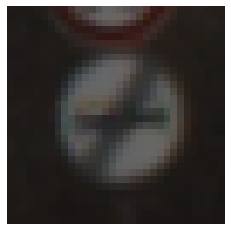

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_whole_picture(features, sizes, index, target_size=(32, 32)):
    # Extract the image data for the specified index
    image_data = features[index]
    
    # Resize the image data to the target size
    image_array = Image.fromarray(image_data).resize(target_size)
    
    plt.imshow(image_array)
    plt.axis('off') 
    plt.show()

# Call the function to display the image
display_whole_picture(train_data['features'], train_data['sizes'], index=6)

<a id="Beispielbilderklassen"></a>

##  3.1 Beispielbilder der jeweiligen Klassen

Für jede Klasse der Verkehrsschilder werden fünf zufällig ausgewählte Beispielbilder generiert und
angezeigt.

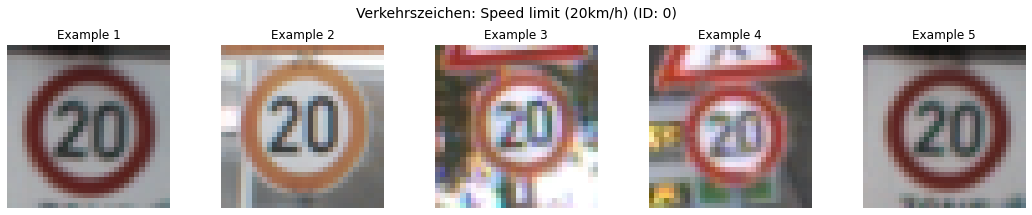

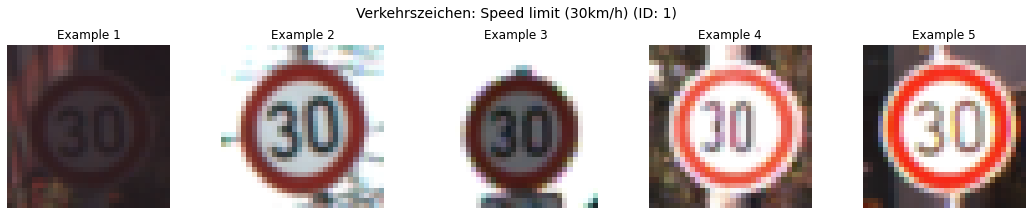

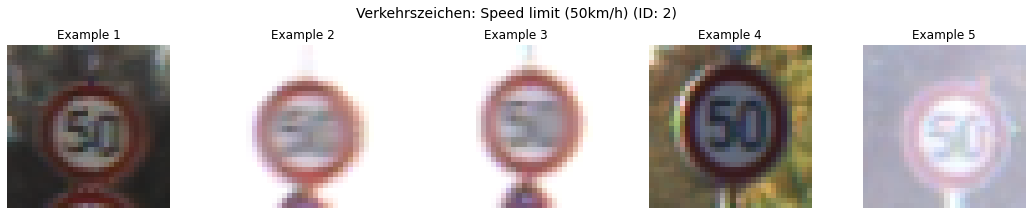

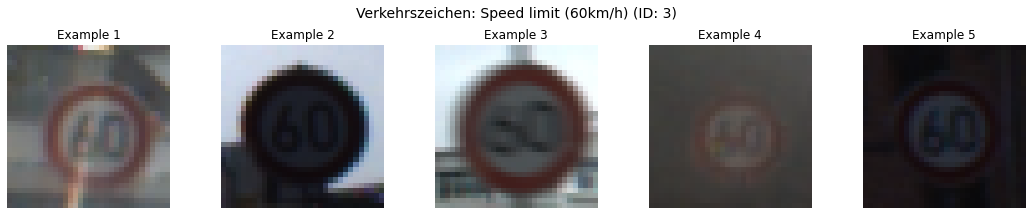

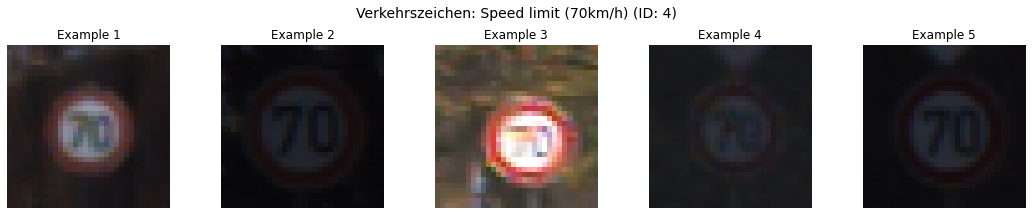

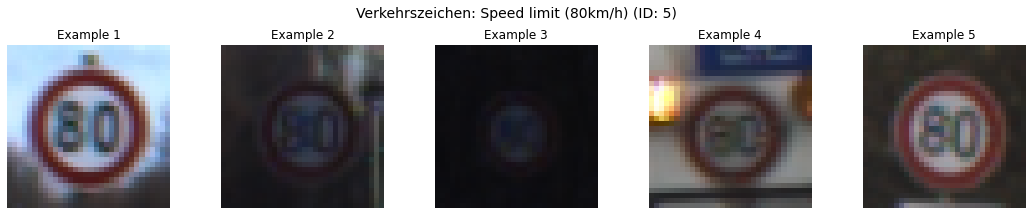

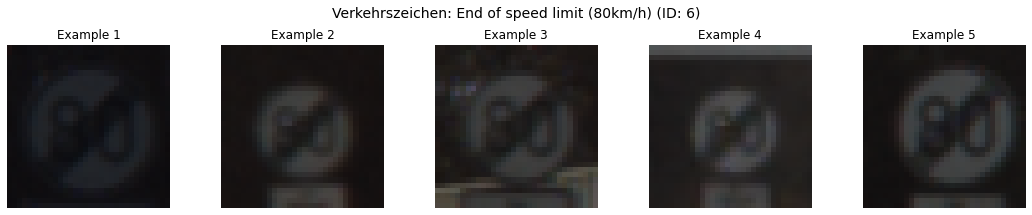

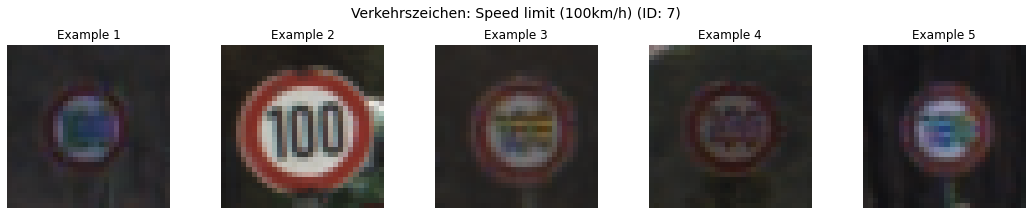

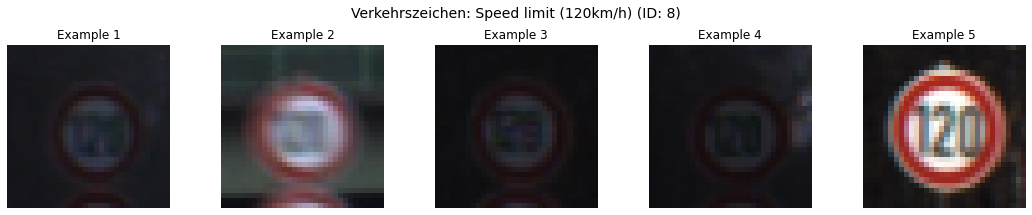

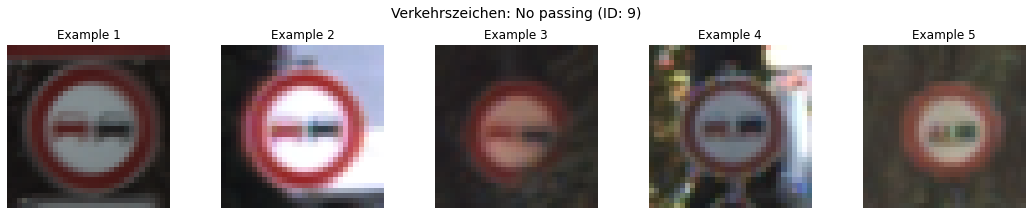

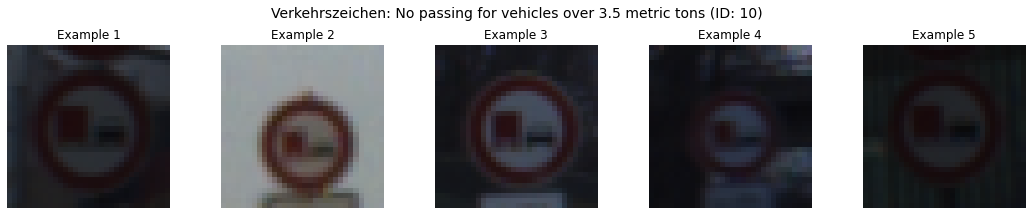

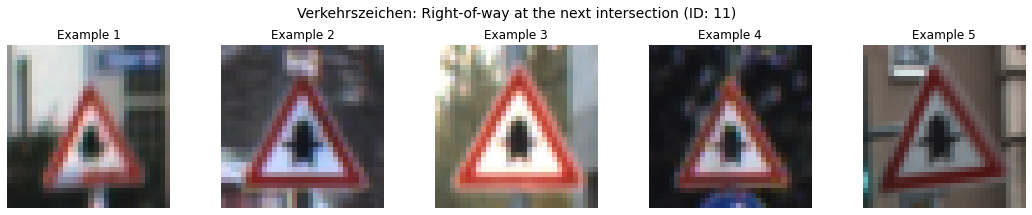

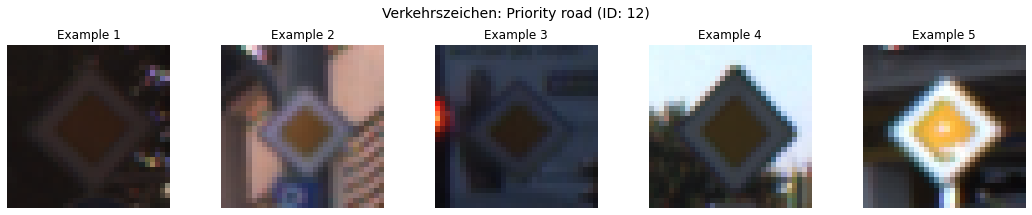

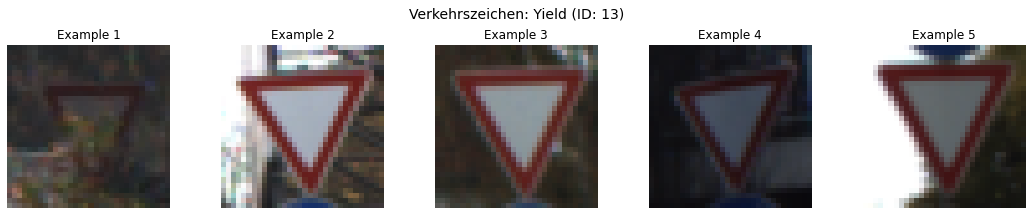

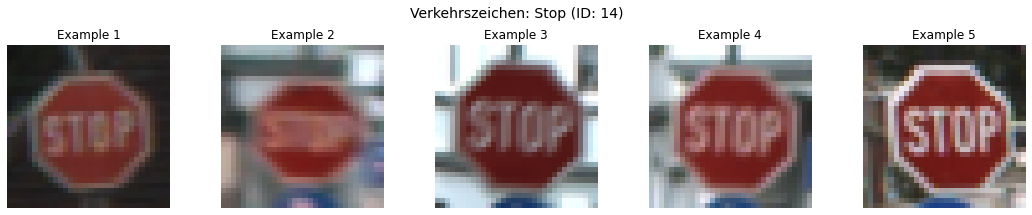

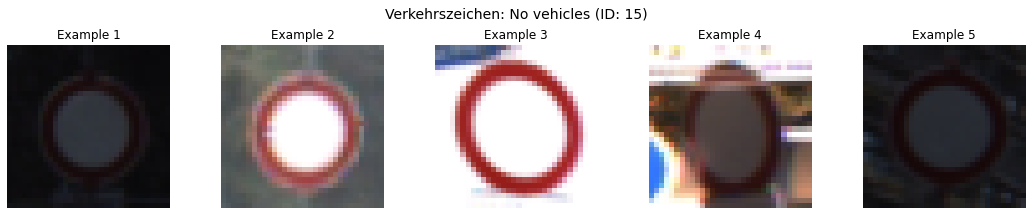

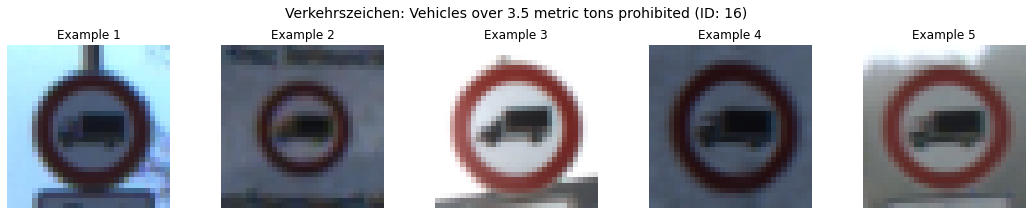

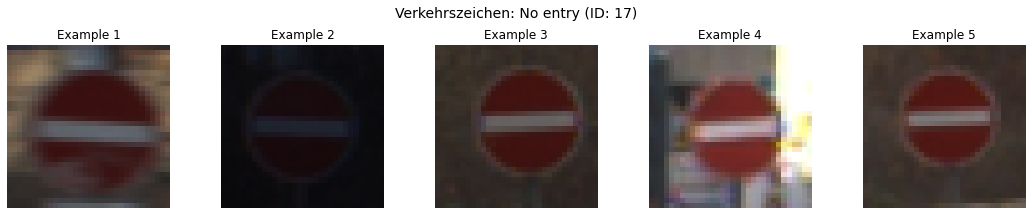

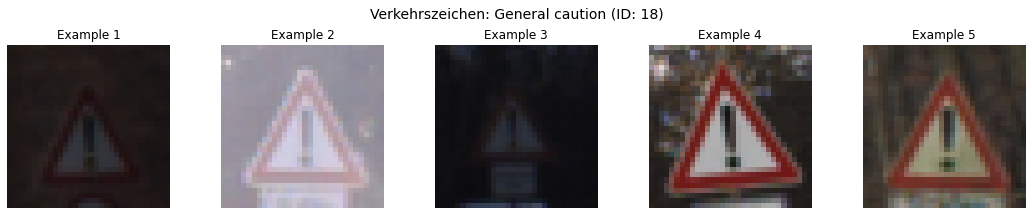

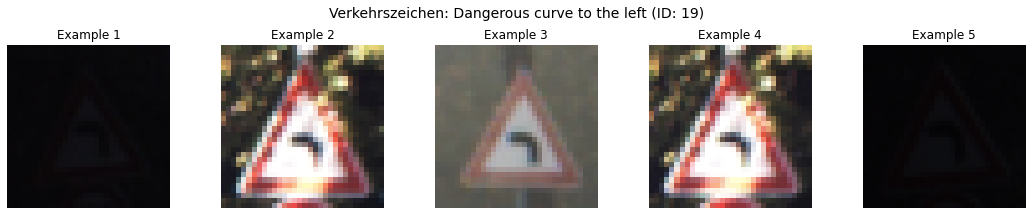

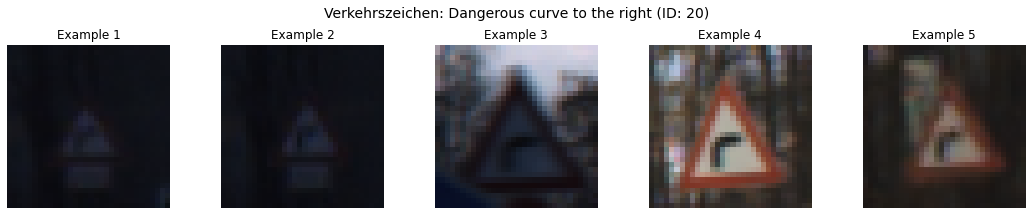

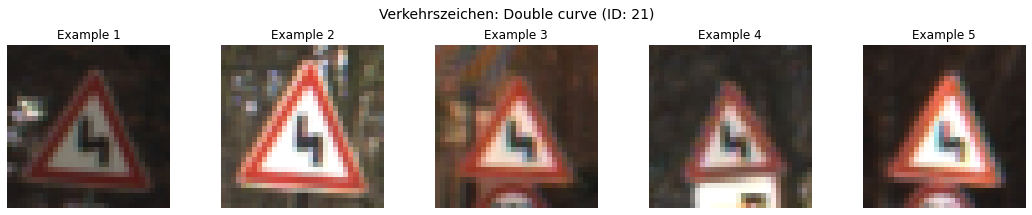

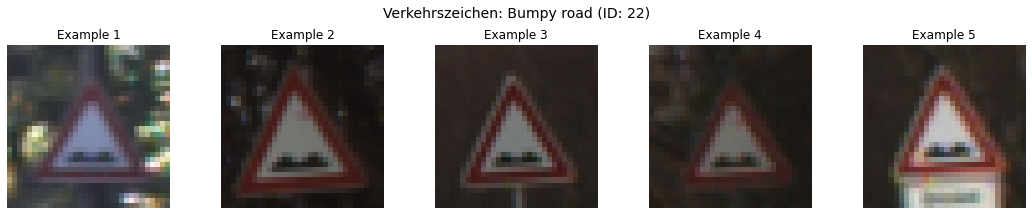

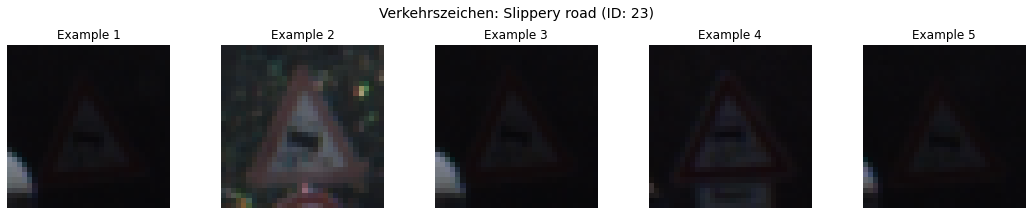

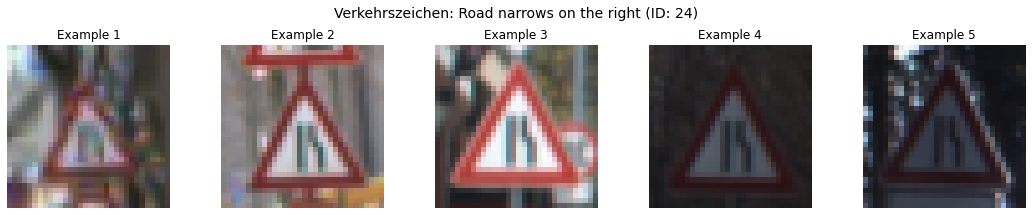

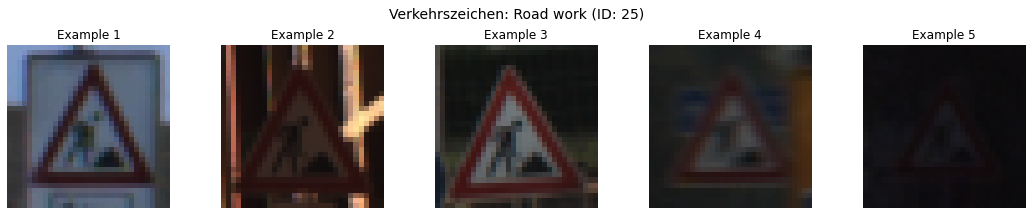

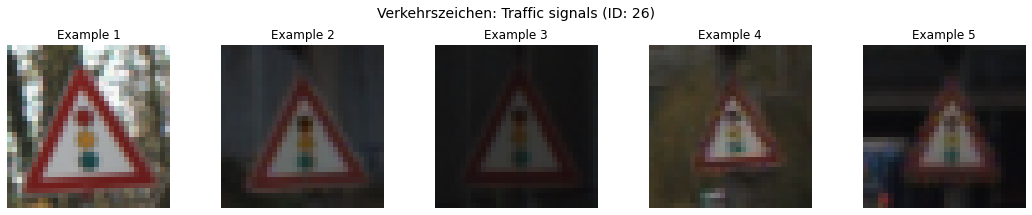

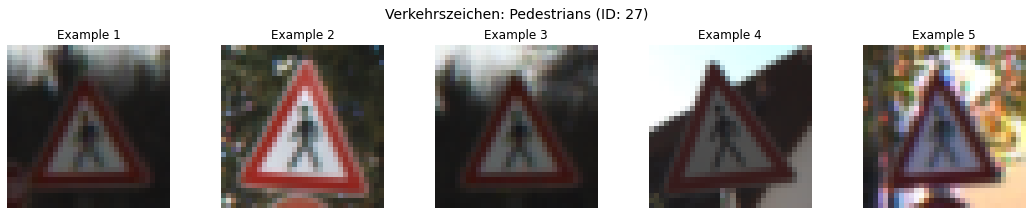

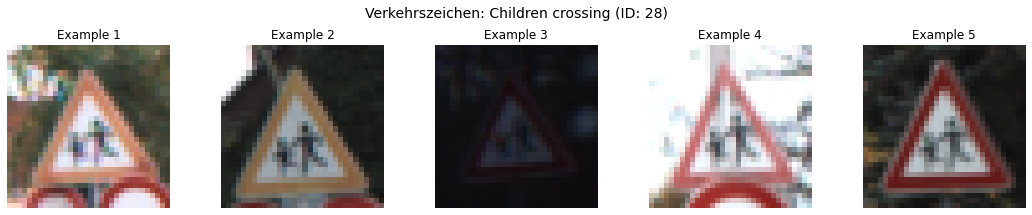

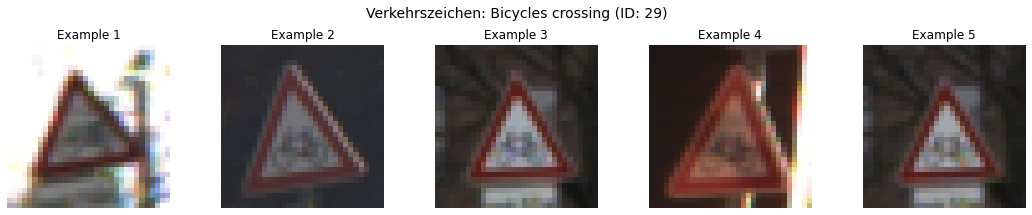

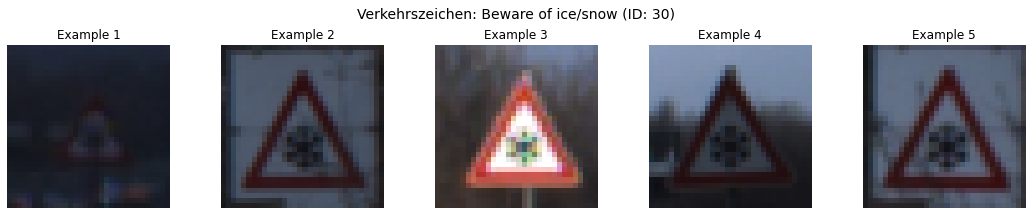

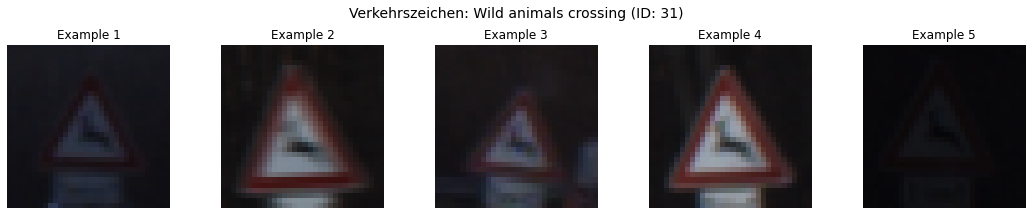

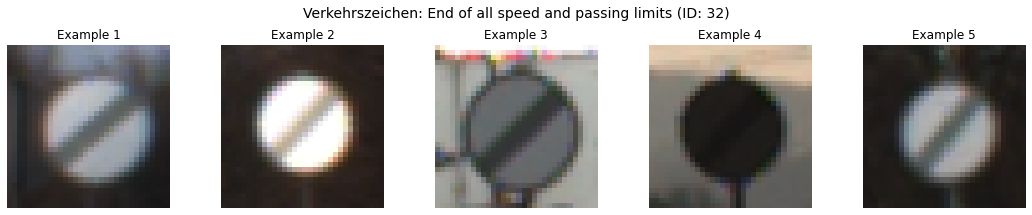

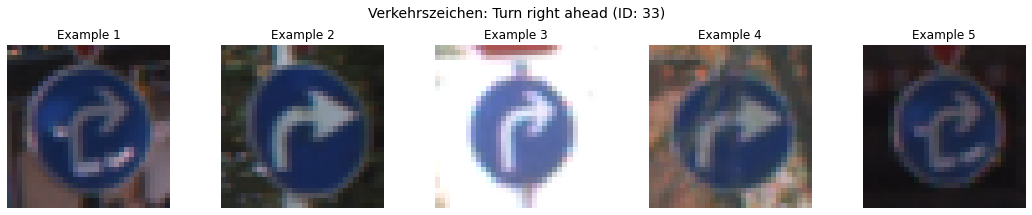

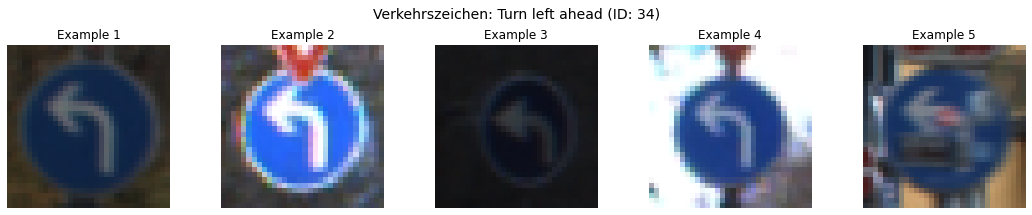

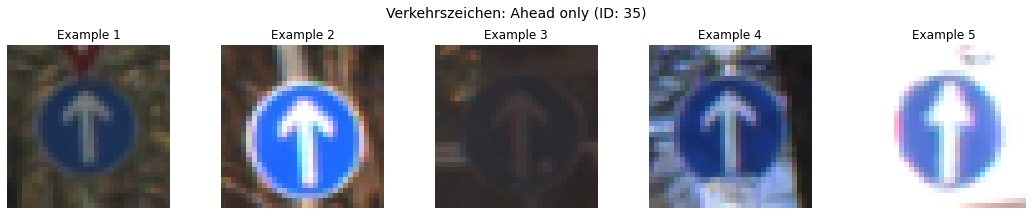

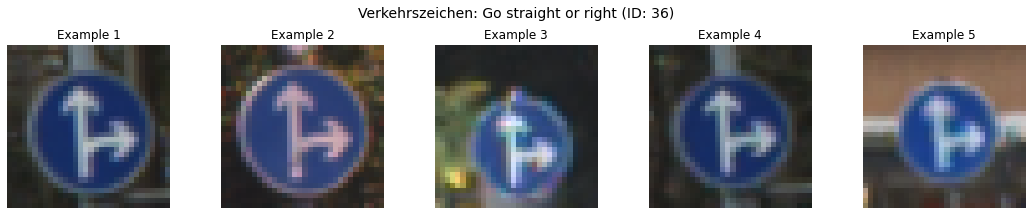

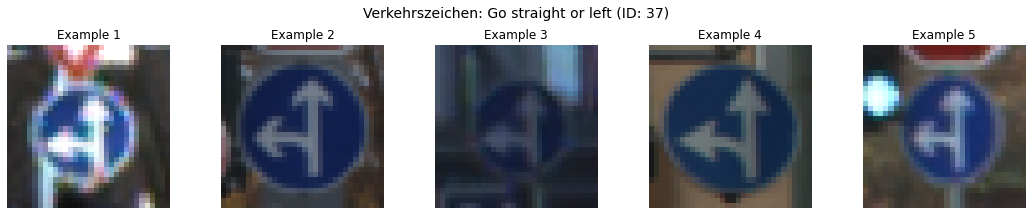

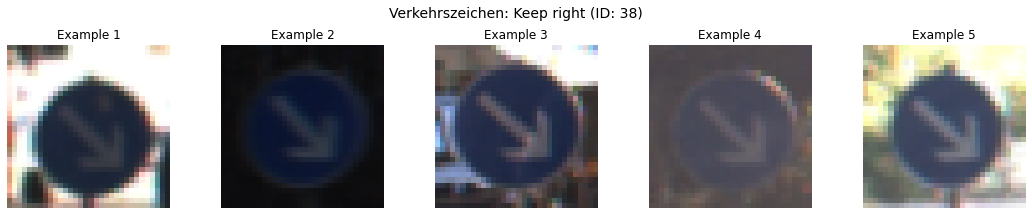

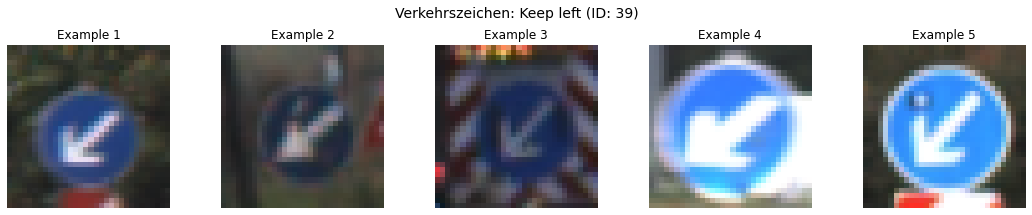

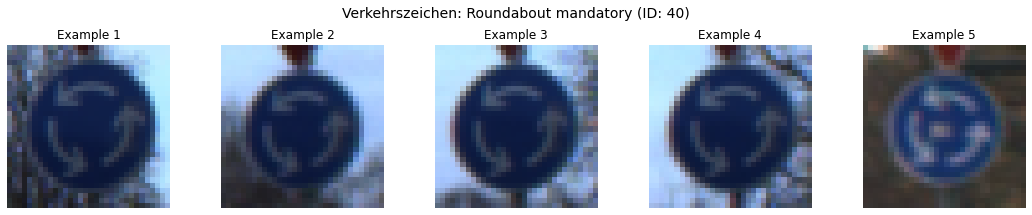

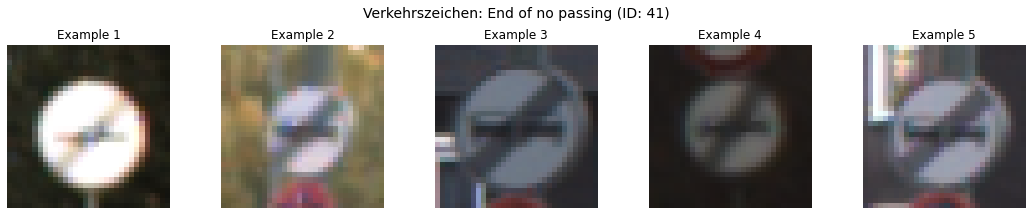

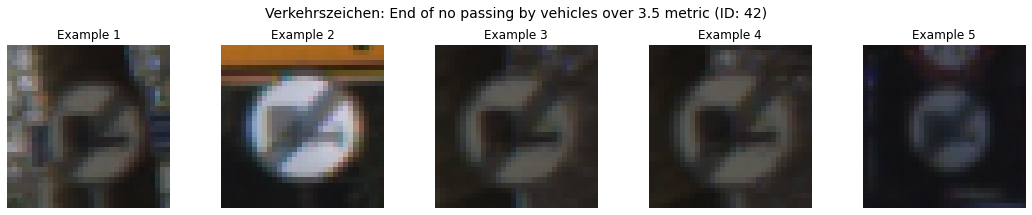

In [12]:
# Function to plot different example images per road sign
def plot_examples_per_sign(dataset, signnames_df, num_examples):
    # Get unique road sign IDs from the dataset
    unique_sign_ids = np.unique(dataset['labels'])

    # Iterate through each unique sign ID and plot examples
    for sign_id in unique_sign_ids:
        # Filter dataset for the current sign ID
        sign_indices = np.where(dataset['labels'] == sign_id)[0]
        
        # Randomly select num_examples images for plotting
        selected_indices = np.random.choice(sign_indices, num_examples, replace=False)
        
        # Plot the selected examples
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Verkehrszeichen: {signnames_df.loc[signnames_df['ClassId'] == sign_id, 'SignName'].values[0]} (ID: {sign_id})", fontsize=14)
        
        for i, example_idx in enumerate(selected_indices):
            example_image_data = dataset['features'][example_idx]
            image_size = 32  # Assuming 32x32 images
            
            # Reshape the image data
            example_image_array = np.reshape(example_image_data, (image_size, image_size, 3))
            
            # Create a subplot
            plt.subplot(1, num_examples, i + 1)
            plt.imshow(example_image_array)
            plt.title(f"Example {i + 1}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Call the function to plot examples per road sign
plot_examples_per_sign(train_data, signnames_df, num_examples=5)

<a id="VisualisierungLabels"></a>

##  3.2 Visualisierung der Labels

Zur Veranschaulichung der Bedeutung der Bildlabels erfolgt eine Visualisierung des Originalbildes mit dem dazugehörigen Label, das auf die Größe von 32x32 skaliert wird.

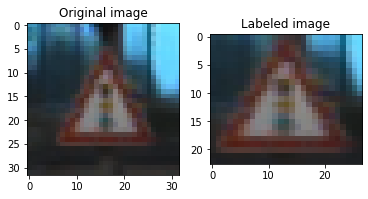

In [16]:
index = 1234

def visualize_labels(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Labeled image')
  plt.imshow(augmented)

def display_whole_picture(features, sizes, index, target_size=(32, 32)):
    # Extract the image data for the specified index
    image = features[index]
    
    # Resize the image data to the target size
    image_array = Image.fromarray(image).resize(target_size)
    
    # Display the image using matplotlib
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis labels
    plt.show()

def display_label(features, coords, index, target_size):
    image = features[index]

    #upscale/downscale image to original format
    image_resized = np.asarray(Image.fromarray(image).resize(target_size)) #returns original image
    #cut the label out of the original image
    image_label = Image.fromarray(image_resized[coords[1]:coords[3]+1, coords[0]:coords[2]+1])
    #resize label to 32x32
    image_label_32 = image_label.resize((32,32))
    for i in range(1):
        seed = (i, 0) 
        new_image = image
        visualize_labels(image, image_label_32)

display_label(train_data['features'], train_data['coords'][index], index, \
              target_size=(train_data['sizes'][index][0], train_data['sizes'][index][1]) )

<a id="VerteilungKlassen"></a>

##  3.3 Verteilung der Klassen

Es werden interaktive Plots für die Verteilung der Menge an Verkehrsschildern in den Trainings-, Validierungs- und Testdaten erstellt.

In [17]:
import plotly.graph_objects as go
import plotly.express as px
def plot_sign_distribution(dataset):
    # count occurence of different values in ndarray
    distribution = np.unique(dataset['labels'], return_counts=True)

    # convert distribution to df
    distribution_df = pd.DataFrame(distribution[1], index=distribution[0], columns=['count'])

    average_value = distribution_df['count'].mean()

    # plot distribution in bar plot 
    fig = px.bar(distribution_df, title="Verteilung der Daten", labels=dict(index="Verkehrsschild ID", value="Anzahl der Vorkommnisse", variable="Daten"))

    # add average line
    fig.add_trace(
    go.Scatter(
        x=[distribution_df.index[0], distribution_df.index[42]],
        y=[average_value, average_value],
        mode='lines',
        name='Average',
        line=dict(color='#DE718B', width=5)
    ) )

    # align tile
    fig.update_layout(
    title={
        "y":0.9,
        "x":0.5,
        "xanchor": "center",
        "yanchor": "top"}
    )

    # adjust colors
    fig.update_traces(marker_color = "#7B104B")

    # increase size of plot
    plt.rcParams['figure.figsize'] = [15, 10]

    fig.show()

**Trainingsdaten**

In [18]:
plot_sign_distribution(train_data)

Klassenverteilung der Trainingsdaten ist nicht gleichmäßig verteilt. Dies könnte beim Training zu Problemen führen. Hier empfhiehlt es sich, die Daten zu balancieren. Auf Grund dessen wird im folgenden Kapitel "Data Augmentation" ein Upsampling durchgeführt.

**Validierungsdaten**

In [19]:
plot_sign_distribution(validation_data)

**Testdaten**

In [20]:
plot_sign_distribution(test_data)

Bei den Validierungs- und Testdaten kommt es zum gleichen Problem, wie bei den Trainingsdaten. Hier könnte es problematisch sein, wenn wichtige Verkehrsschilder nicht in den Testdaten enthalten sind und somit nicht ausreichend überprüft wird, ob das Modell auch diese Schilder erkennen kann. Die Validierungs- und Testdaten dürfen allerdings nicht angepasst werden, da ansonsten die Testdaten verfälscht werden und die Vergleichbarkeit verloren geht. 

<a id="Datenvorverarbeitung"></a>

# 4. Datenvorverarbeitung


<a id="Dataaugmentation"></a>

## 4.1 Data Augmentation und Upsampling
Für einige Problemstellungen im Machine Learning ist die Menge an Trainingsdaten für ein gutes
Modelltraining nicht ausreichend. Die Beschaffung einer größeren Menge an Daten ist jedoch in
einigen Fällen nur schwer oder gar nicht möglich. Um dennoch eine höhere Vielfalt der Daten zu
generieren, wird vor Modelltraining und Auswertung Data Augmentation angewendet. (Lang, 2023;
Yang et al. 2022)<p>
Dabei handelt es sich um eine Technik, die ähnliche, aber realistische Abwandlungen der bereits
vorhandenen Daten generiert. Dies kann auf zwei verschiedene Arten erfolgen. So ist es zum einen
möglich, neue Daten auf Basis bereits vorhandener Daten zu generieren. Zum anderen können
Neuronale Netze neue Daten erzeugen, ohne dass der Originaldatensatz zugrunde gelegt wird. (Awan
2022; Dilmegani 2022; Lang, 2023; Yang et al. 2022)<p>
Beide Techniken können für verschiedene Szenarien eingesetzt werden. Mit einem erweiterten und
umfangreicheren Trainingsdatensatz kann ein mögliches Overfitting vermieden werden, wenn der
originale Trainingsdatensatz für ein bestimmtes Modell zu wenige Datenpunkte beinhaltet. Außerdem
kann mit einem erweiterten Trainingsdatensatz die Accuracy erhöht werden. Jedoch hat Data
Augmentation gewisse Grenzen. So werden möglicherweise vorhandene Verzerrungen im originalen
Datensatz durch Data Augmentation nicht bereinigt und bleiben in dem erweiterten Datensatz
bestehen. Außerdem ist a-priori nicht sicher, ob die Qualität der neu generierten Daten denen der
Originaldaten entspricht bzw. ob überhaupt eine für das Modelltraining erforderliche Qualität
vorliegt. Eine Qualitätssicherung und eine möglicherweise erforderliche Verbesserung der
Datenqualität ist aufwendig und teuer. (Awan 2022)<p>
Für die Erreichung einer hohen Modellgüte ist es erforderlich, dass der Validierungsfehler zusammen
mit dem Trainingsfehler abnimmt. Nach erfolgter Data Augmentation liegt ein umfangreicherer
Datensatz mit einer größeren Anzahl möglicher Datenpunkte vor, um den Abstand zwischen
Trainings- und Validierungssatz sowie zukünftig vorliegenden Testdatensätzen zu minimieren (Shorten
und Khoshgoftaar 2019, S. 2). Da in der vorliegenden Hausarbeit unter anderem Convolutional Neural
Networks eingesetzt werden und diese - zur Vermeidung von Overfitting - auf große
Trainingsdatensätze angewiesen sind, kommt der Data Augmentation im Rahmen der
Datenvorverarbeitung eine große Bedeutung zu, einen umfangreichen und hochwertigen
Trainingsdatensatz zu generieren (Shorten und Khoshgoftaar 2019).<p>
Im Fall von Bilddaten kann Data Augmentation neue Bilder unter anderem mit angepasster Helligkeit,
höherem Kontrast oder abgewandeltem Farbton erzeugen. Die neu generierten Bilder dienen als
zusätzliche Inputdaten für die Trainingsvorgänge der einzelnen Modelle, die für die Klassifizierung der
Verkehrszeichen verwendet werden (Lang, 2023; Yang et al. 2022).<p>
Für die vorliegende Hausarbeit ist die Idee, mit Hilfe von Data Augmentation sowohl die Anzahl der
Trainingsdaten - insbesondere für das CNN - zu erhöhen, als auch realistische Gegebenheiten zu
simulieren, die bei der Erfassung von Verkehrszeichen auftreten können. So kann eine schlechte Sicht
auf die Verkehrsschilder, die durch Schmutz an der Kamera des autonomen Fahrzeugs und an den
Schildern sowie durch eine schlechte Wetterlage verursacht wird, durch veränderte Farbtöne,
Kontraste und Helligkeiten simuliert werden. Darüber hinaus liegen für einige Klassen hauptsächlich
Bilder in niedriger Qualität vor. Die Qualität dieser Bilder wird mit Hilfe der Data Augmentation
erhöht, um das Modelltraining weiter zu verbessern.<p>
Außerdem ist die Tatsache relevant, dass in den Trainingsdaten die Klassen nicht gleichverteilt
vorliegen und einige Verkehrszeichen damit über- bzw. unterrepräsentiert sind. Gängige Methoden
zur Evaluation der Modellperformanz liefern keine exakte Kennzahlen, wenn die Klassen in einem
Datensatz ungleich verteilt sind (Analytics Vidhya, 2017). Kleinere Abweichungen in der Verteilung
auf die Klassen gelten dabei als vernachlässigter (Nabi, 2018). In dem vorliegenden
Trainingsdatensatz enthält die kleinste Klasse 180, die größte Klasse jedoch 2010 Verkehrszeichen,
womit eine starke Ungleichverteilung vorliegt, die beseitigt werden sollte. Daher hat die Data
Augmentation in der vorliegenden Arbeit auch das Ziel, eine Gleichverteilung der Klassen
herzustellen. Dazu erfolgt das Upsamling auf die Anzahl an Bildern, die in der größten Klasse
vorhanden sind, also 2010 Bilder.<p>
Tensorflow bietet Funktionen zur Data Augmentation für Bilddaten (TensorFlow, 2023). Für die
vorliegende Problemstellung werden zwei Varianten angewendet. Eine davon bietet zufallsabhängige
Anpassungen der Bilder auf Basis von angegebenen Intervall-Parametern. Die andere Variante
erzeugt neue Bilder exakt nach den vorgegebenen Parametern. Für Klassen mit überdurchschnittlich
dunklen Bildern (27, 29, 30, 31 und 41) erfolgt eine Erhöhung der Helligkeit um einen festen Wert von
0,2 Einheiten und Erhöhung des Kontrastes von 1,5 Einheiten mit Hilfe der Funktionen
tf.image.adjust_brightness und tf.image.adjust_contrast. Für die Bilder aller anderen Klassen erfolgen
zufallsabhängige Anpassungen der Helligkeit, des Kontrastes sowie des Farbtons. Es wird jede Klasse
auf die Anzahl der Bilder der größten Klasse upsampled. Die Trainingsdaten enthalten nach der Data
Augmentation 2.010 Bilder pro Klasse. Aufgrund der Beibehaltung der Vergleichbarkeit erfolgt keine
Augmentation auf den Test- und Validierungsdaten, sondern ausschließlich auf den Trainingsdaten.<p>


Für das Bild mit dem Index=9750 wird sowohl das original Bild und das angepasste Bild ausgebenen. In dem neu generierten Bild erfolgt eine Erhöhung der Helligkeit sowie des Kontrastes. 

2023-09-10 21:43:30.071950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


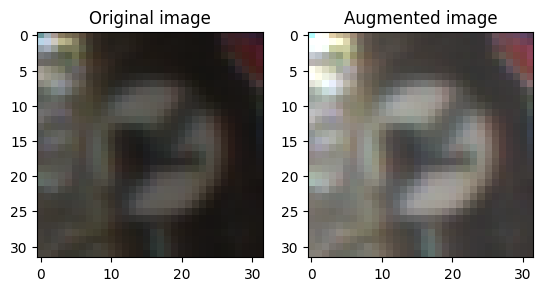

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import random

#Create dictonaries with image objects in features-array
train_images = {'features': [Image.fromarray(i) for i in train_data['features']], 'labels': [train_data['labels'][i] for i in train_data['labels']]}
test_images = {'features': [Image.fromarray(i) for i in test_data['features']], 'labels': [test_data['labels'][i] for i in test_data['labels']]}
validation_images = {'features': [Image.fromarray(i) for i in validation_data['features']], 'labels': [validation_data['labels'][i] for i in validation_data['labels']]}

#The augment function creates new images for each class up to number of images in the class that contains the largest number of images
def augment(dataset, image_dataset, numbers_per_class):
   unique_sign_ids = np.unique(dataset['labels'])
   augmented_features = []
   augmented_labels = []
   augmented_coords = []
   augmented_sizes = []
   for sign_id in unique_sign_ids:
      sign_indices = np.where(dataset['labels'] == sign_id)[0]
      filtered_features = dataset['features'][sign_indices].tolist()
      filtered_labels = dataset['labels'][sign_indices].tolist()
      filtered_coords = dataset['coords'][sign_indices].tolist()
      filtered_sizes = dataset['sizes'][sign_indices].tolist()
      augmented_features.extend(filtered_features)
      augmented_labels.extend(filtered_labels)
      augmented_coords.extend(filtered_coords)
      augmented_sizes.extend(filtered_sizes)
      current_length = len(filtered_features)
      length = len(filtered_features)
      while current_length < numbers_per_class:
         random_index = np.random.choice(sign_indices, 1, replace=False)[0]
         image = image_dataset['features'][random_index]
         method = random.randint(1, 4) #random number that selects the image adjustment method for the current image
         if sign_id in (27, 29, 30, 31, 41):
            augmented = tf.image.adjust_brightness(image, 0.2)
            augmented = tf.image.adjust_contrast(augmented, 1.5)
         if method == 1:
            augmented = tf.image.stateless_random_brightness(image, max_delta=0.5, seed=seed) #change brightness of image
         elif method == 2:
            augmented = tf.image.stateless_random_contrast(image, lower=0.1, upper=0.9, seed=seed) #change contrast of image
         elif method == 3:
            augmented = tf.image.stateless_random_jpeg_quality(image, 75, 95, seed) #change image quality
         elif method == 4:
            augmented = tf.image.stateless_random_saturation(image, 0.5, 3, seed)
         augmented_features.append(augmented.numpy().tolist())
         augmented_labels.append(dataset['labels'][random_index])
         augmented_coords.append(dataset['coords'][random_index])
         augmented_sizes.append(dataset['sizes'][random_index])
         current_length = current_length + 1
   augmented_data = {'features': np.array(augmented_features, dtype=np.uint8), 'labels': np.array(augmented_labels,  dtype=np.uint8), 'coords': np.array(augmented_coords, dtype=np.uint8), 'sizes': np.array(augmented_sizes,  dtype=np.uint8)}
   return augmented_data

def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

seed = (1, 0)
index = 9750
image = train_images['features'][index] #set index og example image to see the difference between original image and image with higher brightness and contrast
new_image = tf.image.adjust_brightness(image, 0.2)
new_image = tf.image.adjust_contrast(new_image, 1.5)
visualize(image, new_image)

train_augmented = augment(train_data, train_images, 2010) #call augment function, scale images up to 2010 images per class (2010 is the largest number of images in a class)

In [74]:
plot_sign_distribution(train_augmented)

<a id="Imagelabeling"></a>

## 4.2 Image Labeling
Image Labeling bezeichnet eine Art der Datenkennzeichnung bestimmter Bereiche und Details in
einem Bild. Bestimmte Objekte in dem Bild werden damit hervorgehoben und können separat erfasst
werden. Das Label eines Bildes ist das kleinstmögliche Rechteck, das das für das Modelltraining und
die Auswertung relevante Objekt enthält (Nelson 2020).<p>
Liegen die hochskalierten Daten vor, werden auf Basis der coords-Daten des jeweiligen Datensatzes
die Labels der einzelnen Bilder extrahiert. Für die Klassifikation der Verkehrsschilder enthält es das
jeweilige Verkehrszeichen mit möglichst wenig Hintergrund bzw. Rauschen. Das coords-Array enthält
die Koordinaten des rechteckigen Bildlabels in der Form [X1, Y1, X2, Y2], wobei die ersten beiden
Koordinaten die obere linke Ecke und die beiden letzten Koordinaten die untere rechte Ecke
kennzeichnen. Auch das Image Labeling erfolgt ausschließlich auf den Trainingsdaten, um die Testund
Validierungsdaten nicht zu manipulieren.


Das Dictionary train_augmented enthält den hochskalierten Datensatz mit den zusätzlich erzeugten Bildern.

Die folgende Funktion schneidet die Label-Bereiche aus den Original-Images heraus und setzt sie auf die standardisierte 32x32-Größe.

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#the following function cuts the label out of the images and returns an array with all labels as pixel color data
def cut_labels(dataset):
    labels = []
    images = []
    indices_to_remove = []  # Create a list to store indices to remove

    for i in range(len(dataset['features'])):
        image = dataset['features'][i]
        image_resized = np.asarray(Image.fromarray(image).resize((dataset['sizes'][i][0], dataset['sizes'][i][1]))) # utilize the size information to resize the image to the original size
        
        try:
            image_label = Image.fromarray(image_resized[dataset['coords'][i][1]:dataset['coords'][i][3]+1, dataset['coords'][i][0]:dataset['coords'][i][2]+1])
        except:
            # Add the current index to the list of indices to remove
            indices_to_remove.append(i)
            continue

        image_label_32 = np.asarray(image_label.resize((32,32)))
        image_label_32_image = Image.fromarray(image_label_32)
        images.append(image_label_32_image)
        labels.append(image_label_32)

    # Remove the items with indices in reverse order
    for i in reversed(indices_to_remove):
        dataset['features'] = np.delete(dataset['features'], i, 0)
        dataset['labels'] = np.delete(dataset['labels'], i, 0)
        dataset['coords'] = np.delete(dataset['coords'], i, 0)
        dataset['sizes'] = np.delete(dataset['sizes'], i, 0)

    return labels, images

train_labels, train_images = cut_labels(train_data) #create one array with image label data and another array with images, both based on the original train data
train_labels = {'features': np.array(train_labels), 'labels': train_data['labels'], 'coords': train_data['coords'], 'sizes': train_data['sizes']} #integrate the label data into a dictionary like the original train_data
train_augmented_labels, train_augmented_images = cut_labels(train_augmented) #create one array with image label data and another array with images, both based on the train dataset containing augmented images
train_augmented_labels = {'features': np.array(train_augmented_labels), 'labels': train_augmented['labels'], 'coords': train_augmented['coords'], 'sizes': train_augmented['sizes']}


valid_labels, valid_images = cut_labels(validation_data)
valid_labels = {'features': np.array(valid_labels), 'labels': validation_data['labels'], 'coords': validation_data['coords'], 'sizes': validation_data['sizes']}

test_labels, test_images = cut_labels(test_data)
test_labels = {'features': np.array(test_labels), 'labels': test_data['labels'], 'coords': test_data['coords'], 'sizes': test_data['sizes']}

### Für die weitere Analyse stehen folgende Trainigns-Datensätze als Dictionary zur Verfügung (alle haben das gleiche Format wie train_data):
* train_data: originale Trainingsdaten
* train_augmented: Trainingsdaten mit zusätzlich erzeugten Bildern
* train_labels: Labels der originalen Trainingsdaten
* train_augmented_labels: Labels der Trainingsdaten und der zusätzlich erzeugten Bilder 

Für den weiteren Verlauf der Hausarbeit wird nur noch der Datensatz train_augmented_labels verwendet. Der hochskalierte Datensatz mit den Image-Labels führt zum Modelltraining mit der besten Performanz, weshalb im weiteren Verlauf der Arbeit ausschließlich dieser verwendet wird.

<a id="Dimensionsreduktion"></a>

## 4.3 Dimensionsreduktion
Dimensionsreduktion dient der Vereinfachung der Daten, ohne (allzu viele) Informationen zu
verlieren (Géron2023, S. 40). Primäre Ziele der Dimensionsreduktion sind die Erkennung multivariater
Zusammenhänge zwischen einzelnen Variablen sowie eine Reduktion der Datenverarbeitungskosten
für das Modelltraining (ArcGIS Pro, o. J.)<p>
Für die Dimensionsreduktion der Verkehrsschild-Daten verwendet unser Fallbeispiel den t-SNEAlgorithmus
aus der scikit-Library. Es dient zur Reduktion hochdimensionaler Daten für eine
Visualisierung auf einer zweidimensionalen Ebene. Da die Verkehrsschild-Daten mit insgesamt vier
Dimensionen eine überschaubare Anzahl an Dimensionen haben, eignet sich der t-SNE-Algorithmus.
t-SNE behält ähnliche Datenpunkte nah beieinander separiert unähnliche voneinander (Géron 2023,
S. 289; scikit-learn o. J.). Die Verkehrsschild-Trainingsdaten werden auf diese Weise auf zwei
Dimensionen reduziert. Für eine geringfügige Verbesserung der Modellperformanz erfolgt
anschließend eine Normalisierung der Bildpunkte, die in RGB-Kodierung angegeben sind, auf das
Intervall [0, 1].


**Normalisierung**

In [4]:
# Normalize the images
train_augmented_labels['features'] = train_augmented_labels['features'] / 255.0
valid_labels['features'] = valid_labels['features'] / 255.0
test_labels['features'] = test_labels['features'] / 255.0

**Dimensionsreduzierung für die Trainingsdaten - Zur Anwendung auf traditionelle Machine Learning Modelle**

Shape of training data before TSNE:  (30000, 32, 32, 3)
Shape of training data after TSNE:  (30000, 2)


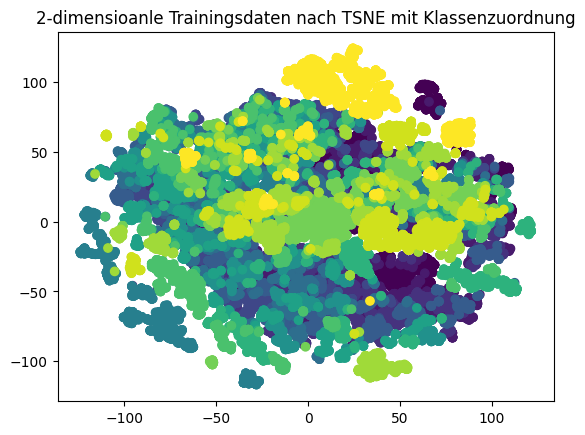

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# only take the first x entries for training to reduce the runtime
train_size = 30000
small_train = {'features': train_augmented_labels['features'][0:train_size], 'labels': train_augmented_labels['labels'][0:train_size], 'coords': train_augmented_labels['coords'][0:train_size], 'sizes': train_augmented_labels['sizes'][0:train_size]}

print("Shape of training data before TSNE: ", small_train['features'].shape)

# Flatten the images 
flattened_train_data = small_train['features'].reshape(train_size, -1)  

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
reduced_train_data = tsne.fit_transform(flattened_train_data)
print("Shape of training data after TSNE: ", reduced_train_data.shape)

# Plot the reduced data
plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1], c=small_train['labels'])
plt.title('2-dimensioanle Trainingsdaten nach TSNE mit Klassenzuordnung')
plt.show()

**Dimenstionsreduzierung für die Validierungsdaten**


Shape of validation data before TSNE:  (4410, 32, 32, 3)
Shape of validation data after TSNE:  (4410, 2)


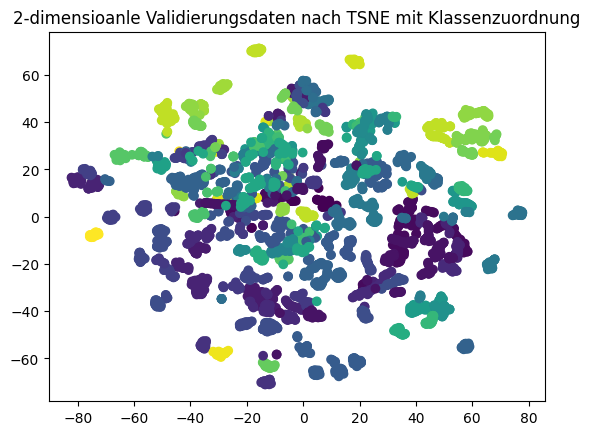

In [7]:
from sklearn.manifold import TSNE

print("Shape of validation data before TSNE: ", valid_labels['features'].shape)

# Flatten the images 
flattened_validation_data = valid_labels['features'].reshape(4410, -1)  


# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
reduced_validation_data = tsne.fit_transform(flattened_validation_data)
print("Shape of validation data after TSNE: ", reduced_validation_data.shape)

# Plot the reduced data
plt.scatter(reduced_validation_data[:, 0], reduced_validation_data[:, 1], c=valid_labels['labels'])
plt.title('2-dimensioanle Validierungsdaten nach TSNE mit Klassenzuordnung')
plt.show()

**Dimensionsreduzierung für die Testdaten**

Shape of test data before TSNE:  (12627, 32, 32, 3)
Shape of test data after TSNE:  (12627, 2)


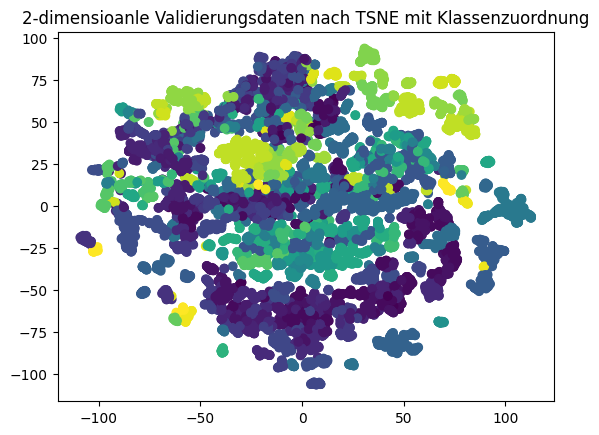

In [8]:
print("Shape of test data before TSNE: ", test_labels['features'].shape)

# Flatten the images 
flattened_test_data = test_labels['features'].reshape(12627, -1) 

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
reduced_test_data = tsne.fit_transform(flattened_test_data)
print("Shape of test data after TSNE: ", reduced_test_data.shape)

# Plot the reduced data
plt.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1], c=test_labels['labels'])
plt.title('2-dimensioanle Validierungsdaten nach TSNE mit Klassenzuordnung')
plt.show()

<a id="Evaluierungvontraditionellenml"></a>

# 5. Evaluierung von traditionellen Machine Learning Modellen

Für Klassifikationsprobleme können verschiedene Machine-Learning-Ansätze verwendet werden. Die
traditionellen Ansätze sind klassischen und eher einfache Methoden. Die verschiedenen Ansätze
haben ihre Vor- und Nachteile, sodass nicht grundsätzlich gesagt werden kann, welches der beste ist,
da dies vom Datensatz und von der Problemstellung abhängig ist. Daher ist es in den meisten Fällen
ratsam, verschiedene Ansätze zu testen und diese zu bewerten, um die passende Methode für den
Anwendungsfall bestimmen zu können (Dreiseitl et al., 2001). <p>
In diesem Jupyter Notebook wurden ebenfalls verschiedene Machine-Learning-Ansätze getestet.
Hierbei wurden die folgende Methoden getestet:
- GaussianNB
- LinearDiscriminantAnalysis
- AdaBoostClassifier
- QuadraticDiscriminantAnalysis
- MLPClassifier
- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostClassifier
- XGBClassifier
- NuSVC
- SVC
<p>
Dabei konnte keiner der traditionellen Machine-Learning-Ansätze überzeugen, da die Accuracy dieser
zwischen  1,60 und 5,41% liegt, sodass nur ein geringer Anteil der Verkehrszeichen korrekt zugeordnet
worden ist. Dadurch besteht Bedarf nach einem Modell mit hoher Genauigkeit wie dem
Convolutional Neural Network.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model_performance(test_predictions, test_labels):
    print("Evaluating model performance:")
    print("Accuracy: ", accuracy_score(test_labels, test_predictions))
    print("Precision: ", precision_score(test_labels, test_predictions, average='weighted')) 
    print("Recall: ", recall_score(test_labels, test_predictions, average='weighted')) 
    print("F1-Score: ", f1_score(test_labels, test_predictions, average='weighted')) 

Test der Funktion mit dem RandomForestClassifier mit dem small_train Datensatz. Dieser wurde auf die ersten 30.000 Bilder reduziert. Reduced_test_data sind die dimensionsreduzierten Testdaten.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X=reduced_train_data, y=small_train['labels'])

predictions = rfc.predict(reduced_test_data)

evaluate_model_performance(predictions, test_data['labels'])

Evaluating model performance:
Accuracy:  0.038805733745149285
Precision:  0.028053306058898338
Recall:  0.038805733745149285
F1-Score:  0.03210565030083235


/Users/marenabele/opt/anaconda3/envs/nak_ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




**RandomForestClassifier mit den 32x32 Bildern** 

Evaluating model performance:

Accuracy:  0.03847980997624703

Precision:  0.03457271436514516

Recall:  0.03847980997624703

F1-Score:  0.036152324613748926

In [10]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

random_state = 42  

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True, random_state=random_state),
    NuSVC(probability=True, random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    AdaBoostClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=random_state),
    xgb.XGBClassifier(random_state=random_state)
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Precision", "Recall", "F1_Score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    print("Starting training for classifier: ", clf.__class__.__name__)
    clf.fit(reduced_train_data, small_train['labels'])
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)

    print('****Results****')
    predictions = clf.predict(reduced_test_data)

    acc = accuracy_score(test_data['labels'], predictions)
    prec = precision_score(test_data['labels'], predictions, average='weighted')
    recall = recall_score(test_data['labels'], predictions, average='weighted')
    f1 = f1_score(test_data['labels'], predictions, average='weighted')

    print("Accuracy: {:.4%}".format(acc))
    print("Precision: {:.4%}".format(prec))
    print("Recall: {:.4%}".format(recall))
    print("F1_Score: {:.4%}".format(f1))    
    
    log_entry = pd.DataFrame([[name, acc*100, prec, recall, f1]], columns=log_cols)
    # add the new row to the df
    log = pd.concat([log, log_entry], ignore_index=True)
    
    
print("="*30)

Starting training for classifier:  KNeighborsClassifier
KNeighborsClassifier
****Results****


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 7.6661%
Precision: 4.9091%
Recall: 7.6661%
F1_Score: 5.8723%
Starting training for classifier:  SVC
SVC
****Results****


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 8.1730%
Precision: 4.6857%
Recall: 8.1730%
F1_Score: 5.4595%
Starting training for classifier:  NuSVC
NuSVC
****Results****


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 8.5135%
Precision: 5.6573%
Recall: 8.5135%
F1_Score: 6.1590%
Starting training for classifier:  DecisionTreeClassifier
DecisionTreeClassifier
****Results****
Accuracy: 6.6683%
Precision: 4.0545%
Recall: 6.6683%
F1_Score: 4.9692%
Starting training for classifier:  RandomForestClassifier
RandomForestClassifier
****Results****


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 7.4127%
Precision: 4.6665%
Recall: 7.4127%
F1_Score: 5.6335%
Starting training for classifier:  AdaBoostClassifier
AdaBoostClassifier
****Results****
Accuracy: 7.4681%
Precision: 4.7075%
Recall: 7.4681%
F1_Score: 5.0844%
Starting training for classifier:  GradientBoostingClassifier


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier
****Results****


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/tf_env/lib/pyt

Accuracy: 6.4940%
Precision: 4.1509%
Recall: 6.4940%
F1_Score: 4.8602%
Starting training for classifier:  GaussianNB
GaussianNB
****Results****
Accuracy: 5.6387%
Precision: 2.3014%
Recall: 5.6387%
F1_Score: 2.9068%
Starting training for classifier:  LinearDiscriminantAnalysis
LinearDiscriminantAnalysis
****Results****
Accuracy: 6.1931%
Precision: 5.3713%
Recall: 6.1931%
F1_Score: 4.6699%
Starting training for classifier:  QuadraticDiscriminantAnalysis
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 6.3594%
Precision: 3.3831%
Recall: 6.3594%
F1_Score: 3.8599%
Starting training for classifier:  MLPClassifier


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLPClassifier
****Results****
Accuracy: 6.2802%
Precision: 3.8184%
Recall: 6.2802%
F1_Score: 4.5189%
Starting training for classifier:  XGBClassifier
XGBClassifier
****Results****
Accuracy: 6.6049%
Precision: 4.2017%
Recall: 6.6049%
F1_Score: 5.0464%


/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Sort values
log_sorted_acc = log.sort_values(by=['Accuracy'])
log_sorted_pre = log.sort_values(by=['Precision'])
log_sorted_rec = log.sort_values(by=['Recall'])
log_sorted_f1 = log.sort_values(by=['F1_Score'])

In [31]:
#!pip install sns

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2658 sha256=982a4538f5f728adb9b9ec8d532b8a14e33f67adfe7a1285f14ff0f14a4e8964
  Stored in directory: /Users/marenabele/Library/Caches/pip/wheels/ff/12/fa/4d724fdfed493cfe12b239ae9a0bc26b2fd85bb7dc9ecde7c3
Successfully built sns


**Visualisierung der Ergebnisse**

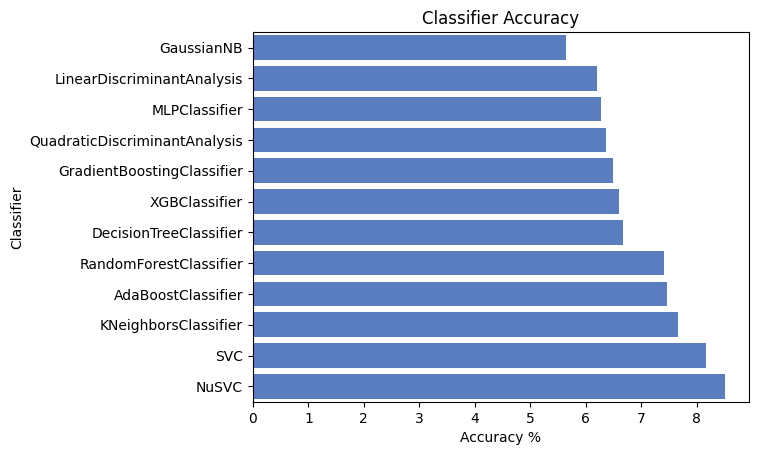

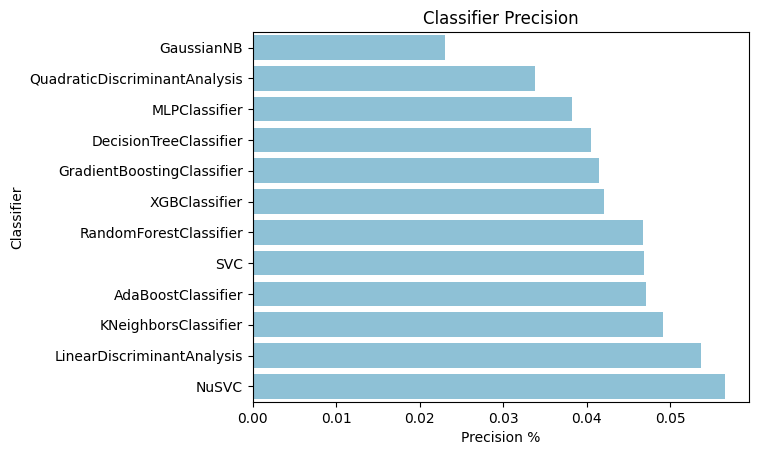

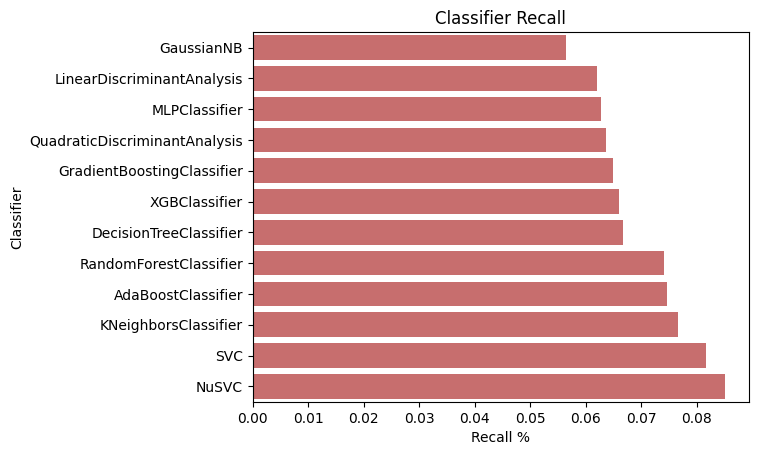

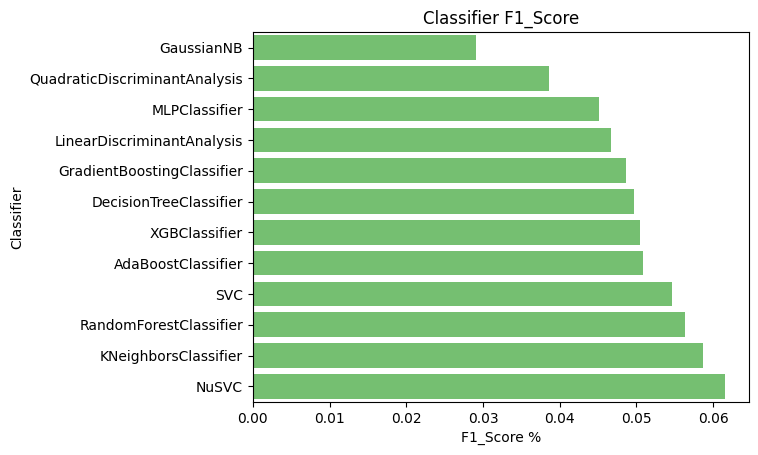

In [16]:
import seaborn as sns

#Accuracy Plot
sns.set_color_codes("muted")
ax =sns.barplot(x='Accuracy', y='Classifier', data=log_sorted_acc, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


#Precision Plot
sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log_sorted_pre, color="c")

plt.xlabel('Precision %')
plt.title('Classifier Precision')
plt.show()

# Recall Plot
sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log_sorted_rec, color="r")

plt.xlabel('Recall %')
plt.title('Classifier Recall')
plt.show()


#F1_Score Plot
sns.set_color_codes("muted")
sns.barplot(x='F1_Score', y='Classifier', data=log_sorted_f1, color="g")

plt.xlabel('F1_Score %')
plt.title('Classifier F1_Score')
plt.show()

<a id="Evaluierungvondl"></a>

# 6. Evaluierung des Deep Learning Modells

Data to use for training:

In [33]:
print("Shape of X_train data: ", train_augmented_labels['features'].shape)
print("Shape of y_train data: ", train_augmented_labels['labels'].shape)
print("Shape of X_validation data: ", valid_labels['features'].shape)
print("Shape of y_validation data: ", valid_labels['labels'].shape)
print("Shape of X_test data: ", test_labels['features'].shape)
print("Shape of y_test data: ", test_labels['labels'].shape)

Shape of X_train data:  (86430, 32, 32, 3)
Shape of y_train data:  (86430,)
Shape of X_validation data:  (4410, 32, 32, 3)
Shape of y_validation data:  (4410,)
Shape of X_test data:  (12627, 32, 32, 3)
Shape of y_test data:  (12627,)


Für die Bewertung von Convolutional Neural Networks können verschiedene Werte in Betracht
gezogen werden. Zum einen gibt die Accuracy an, wie viel Prozent der getroffenen Klassifikationen
korrekt sind. Daher ist die Accuracy eine wichtige Kennzahl für die Evaluation eines Convolutional
Neural Networks, da mit dieser auf den ersten Blick die Trefferquote eingesehen werden kann. Die
Loss Funktion hingegen wird verwendet, um die Distanz zwischen den vorhergesagten und den
tatsächlichen Werten anzugeben. Bei Regressions- und Klassifikationsproblemen wird daher eine
Minimierung der Loss-Funktion angestrebt, da dies zu einer genaueren Vorhersage der Werte führt.
Zusätzlich kann die Trainingszeit des Convolutional Neural Networks zur Bewertung mit einbezogen
werden, die vor allem dann relevant ist, wenn begrenzte Zeit oder Kapazitäten eine Einschränkung
sein könnten (Li et al., 2022).
<p>
Bei dem Convolutional Neural Network zur Klassifikation der Verkehrszeichen liegt eine hohe
Accuracy vor, die für ein Modell sprechen, das die meisten Verkehrszeichen in die richtige Klasse
einordnet. Ebenso ist das Ergebnis der Loss-Funktion niedrig, was diese Annahme bestätigt. In diesem
Jupyter-Notebook wurde die Trainingszeit nicht als relevant eingestuft, sodass diese zur Bewertung
vernachlässigt werden kann.

In [34]:
# build cnn model with tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


# build model
model_cnn = models.Sequential()

# add layers
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization()) 
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization()) 
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(43, activation='relu'))

# print model summary
model_cnn.summary()

# Define a learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch) 

# define an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# compile model
model_cnn.compile(optimizer=Adam(learning_rate=1e-3),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# train model
history = model_cnn.fit(train_augmented_labels['features'], train_augmented_labels['labels'], 
                    epochs=100,
                    validation_data=(valid_labels['features'], valid_labels['labels']),
                    callbacks=[lr_schedule, early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 12, 12, 64)        2

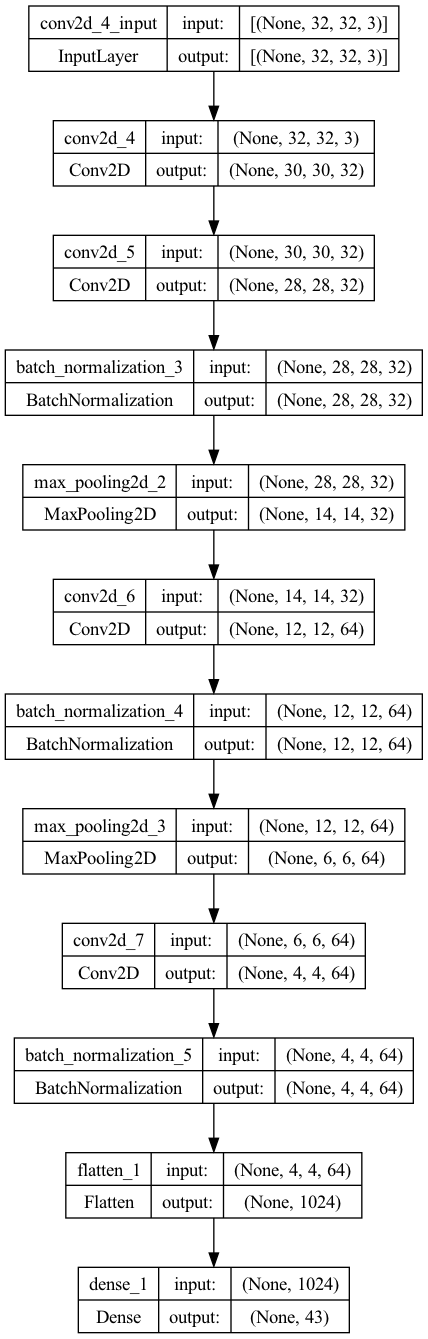

In [18]:
# plot model
tf.keras.utils.plot_model(model_cnn, show_shapes=True)

Speichern des Modells als cnn.p

In [36]:
# safe model in pickle
import pickle

with open('../models/cnn.p', 'wb') as f:
    pickle.dump(model_cnn, f)

In [19]:
# load model
with open('../models2/cnn.p', 'rb') as f:
    model_cnn = pickle.load(f)



395/395 [==============================] - 5s 12ms/step
395/395 - 4s - loss: 0.1145 - accuracy: 0.9796 - 4s/epoch - 11ms/step
Test accuracy:  0.979567593252554
Test loss:  0.1144515872001648
Test error:  0.02043241262435913
Precision:  0.9801543181346566
Recall:  0.979567593252554
F1-Score:  0.9792714132026887


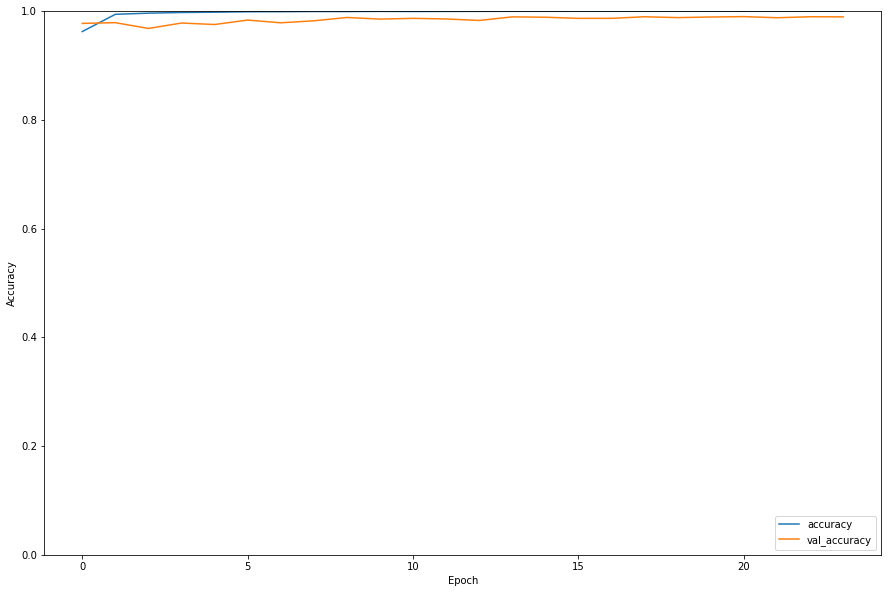

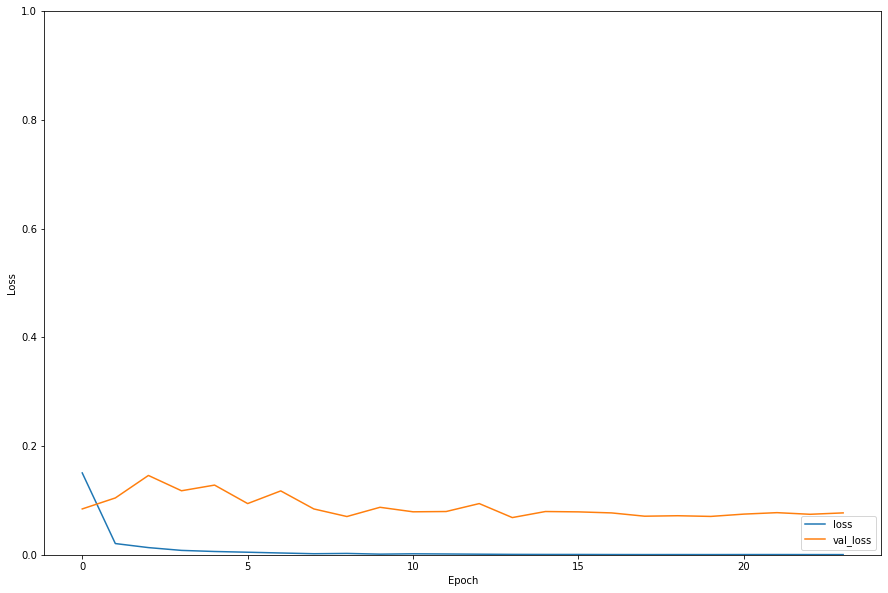

In [ ]:
# evaluate model
def evaluate_deep_learning_model(model, name, test_data, test_labels):

    # make predictions
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_data)

    predictions = np.argmax(predictions, axis=1) # to get the predicted class

    # get probabilty for the predictions
    predictions_probability = np.max(probability_model.predict(test_data), axis=1)

    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

    print("Test accuracy: ", accuracy_score(test_labels, predictions))
    acc =  accuracy_score(test_labels, predictions)
    print("Test loss: ", test_loss)
    print("Test error: ", 1 - test_acc)
    print("Precision: ", precision_score(test_labels, predictions, average='weighted'))
    prec = precision_score(test_labels, predictions, average='weighted')
    print("Recall: ", recall_score(test_labels, predictions, average='weighted'))
    recall = recall_score(test_labels, predictions, average='weighted')
    print("F1-Score: ", f1_score(test_labels, predictions, average='weighted'))
    f1 = f1_score(test_labels, predictions, average='weighted')

    log_entry = pd.DataFrame([[name, acc*100, prec, recall, f1]], columns=log_cols)    

    # add to df
    log = pd.concat([log, log_entry], ignore_index=True)

    # plot accuracy and loss over epochs
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    return predictions, predictions_probability, log

predictions, predictions_probability, log = evaluate_deep_learning_model(model_cnn, 'cnn', test_labels['features'], test_labels['labels'])

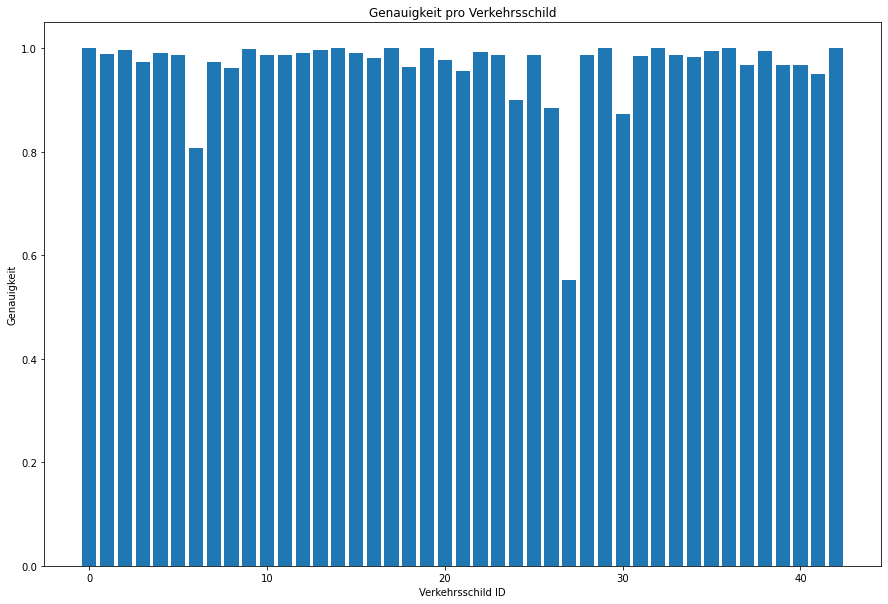

In [38]:
# plot accuracy for each class
from sklearn.metrics import accuracy_score

accuracy_per_class = []

for i in range(43):
    indices = np.where(test_labels['labels'] == i)[0]
    accuracy_per_class.append(accuracy_score(test_labels['labels'][indices], predictions[indices]))

plt.bar(np.arange(43), accuracy_per_class)
plt.xlabel('Verkehrsschild ID')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit pro Verkehrsschild')
plt.show()

In [39]:
# print top 5 classes with lowest accuracy
accuracy_per_class = np.array(accuracy_per_class)
five_classes_with_lowest_accuracy = accuracy_per_class.argsort()[:5]
print("Top 5 Klassen mit der niedrigsten Genauigkeit: ", five_classes_with_lowest_accuracy)

Top 5 Klassen mit der niedrigsten Genauigkeit:  [27  6 30 26 24]


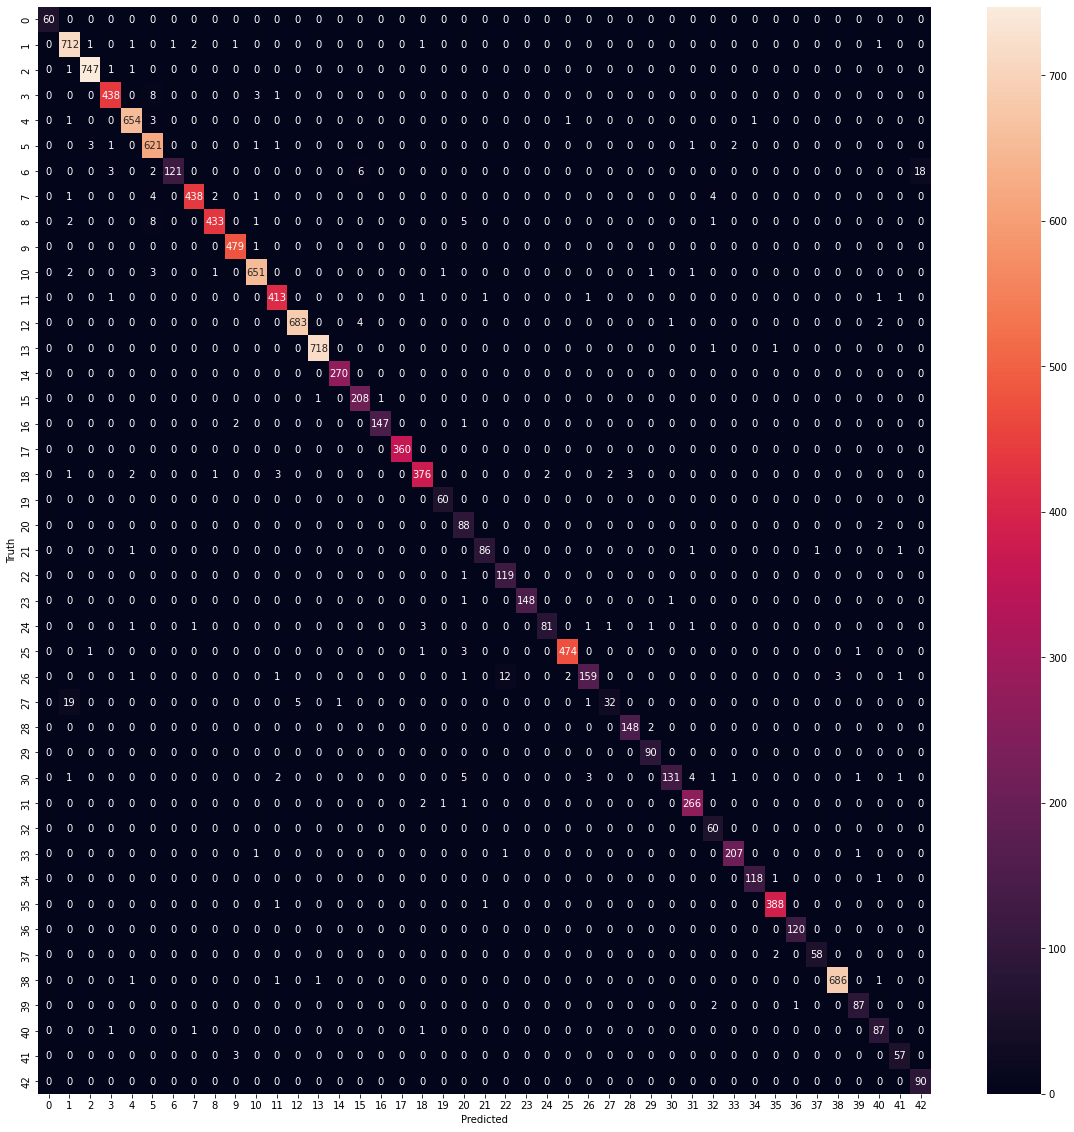

In [40]:
# confusion matrix to investigate which street signs are often mistaken for each other
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get confusion matrix
cm = confusion_matrix(test_data['labels'], predictions) 

# plot confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Die abgebildete Konfusionsmatrix zeigt, wie das CNN die Testdaten klassifiziert. Jede Zeile der Matrix stellt eine reale und jede Spalte eine vorhergesagte Klasse dar. Ein Klassifikationsmodell sollte möglichst viele Klassen korrekt vorhersagen. So hat das CNN insgesamt 712 Verkehrszeichen der Klasse 1 korrekt als Klasse 1 vorhergesagt. Jedoch ist unter anderem ein Schild der Klasse 1 als Klasse 2 klassifiziert. Ein perfekter Klassifikatior würde ausschließlich richtig Positive und richtig Negative Vorhersagen treffen und damit nur Werte ungleich null auf der Hauptdiagonalen produzieren. Die Anzahl der Werte ungleich null außerhalb der Hauptdiagonalen sind im Vergleich zur Anzahl an richtigen Klassifikationen sehr gering, weshalb das CNN insgesamt ein guter Klassifikation ist. (Geron 2023, S. 141f.)

**Ausgabe der fünf schlechtesten Klassen**

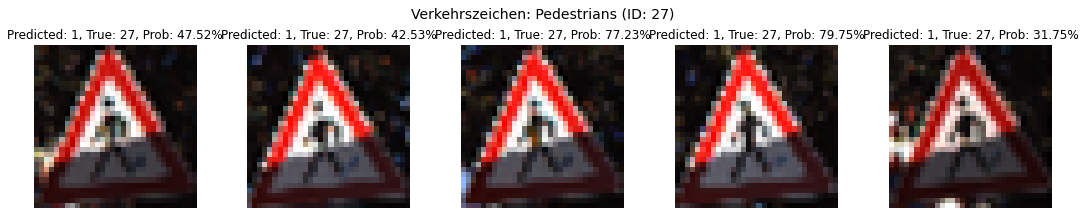

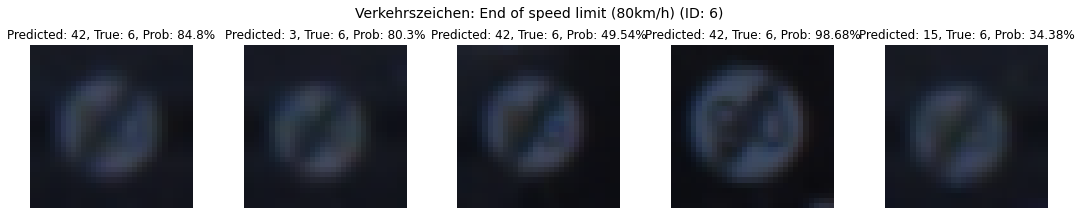

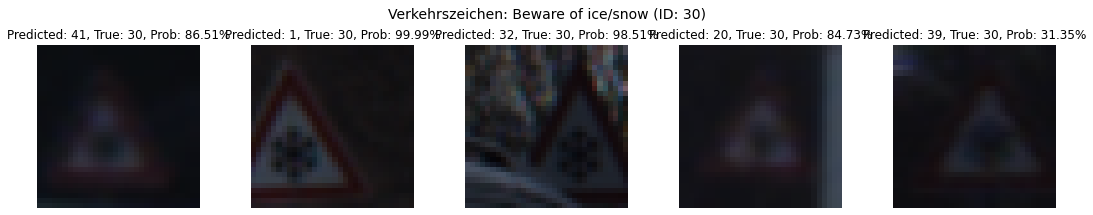

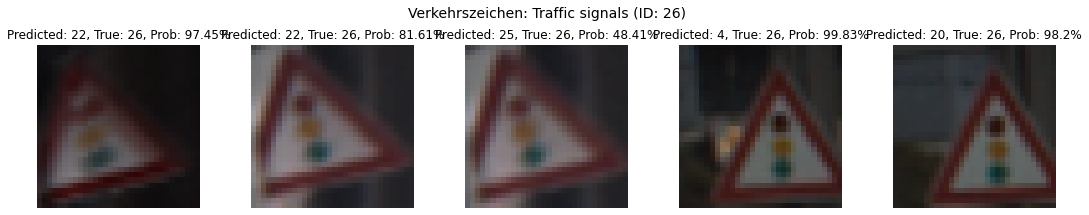

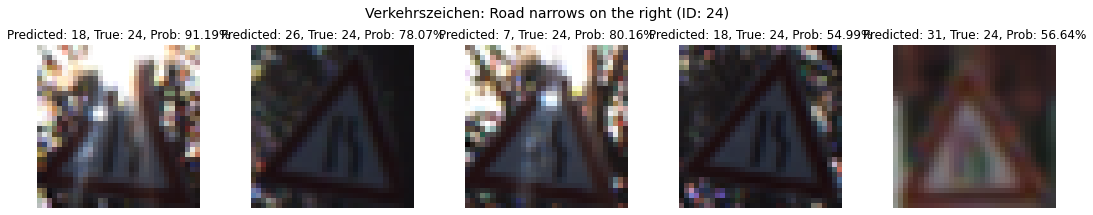

In [41]:
# for the values in five_classes_with_lowest_accuracy, plot 5 examples of wrongly classified images
def plot_examples_of_wrongly_classified_images(test_data, predictions, five_classes_with_lowest_accuracy):
    for i in five_classes_with_lowest_accuracy:
        indices = np.where(test_data['labels'] == i)[0]
        wrongly_classified_indices = np.where(predictions[indices] != i)[0]
        selected_indices = np.random.choice(indices[wrongly_classified_indices], 5, replace=False)
        
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Verkehrszeichen: {signnames_df.loc[signnames_df['ClassId'] == i, 'SignName'].values[0]} (ID: {i})", fontsize=14)
        
        for i, example_idx in enumerate(selected_indices):
            example_image_data = test_data['features'][example_idx]
            image_size = 32  # Assuming 32x32 images (adjust as needed)
            
            # Reshape the image data
            example_image_array = np.reshape(example_image_data, (image_size, image_size, 3))
            
            # Create a subplot
            plt.subplot(1, 5, i + 1)
            plt.imshow(example_image_array)
            # add predicted class and true class as title
            plt.title(f"Predicted: {predictions[example_idx]}, True: {test_data['labels'][example_idx]}, Prob: {np.round(100*predictions_probability[example_idx], 2)}%")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

plot_examples_of_wrongly_classified_images(test_labels, predictions, five_classes_with_lowest_accuracy)

---

<a id="Hyperparameter"></a>

# 7. Hyperparameter Tuning für das CNN-Model
CNN-Modelle können für eine bessere Performance angepasst werden. Hierbei werden Variablen des
CNN, auch Hyperparameter genannt, für das Training angepasst. Diese beeinflussen das Verhalten
und die Architektur des Modells. Es gibt einige Hyperparameter, die optimiert werden können. Dazu
zählen beispielsweise die batch size, die learning rate, die Anzahl der Knoten in jedem Layer, die
Anzahl der Layers im Generellen, die Dropout-Rate und noch einige mehr. Für die optimale Leistung
des CNN ist eine Abstimmung dieser Hyperparameter ausschlaggebend (Rendyk, 2023). <p>
Der Prozess nach dieser optimalen Abstimmung an Hyperparametern wird als Hyperparameter
Tuning bezeichnet. Ziel ist eine Maximierung der Effektivität und Leistung des CNN. Beim Tuning
werden die einzelnen Variablen systematisch untersucht und das CNN für Werte oder Bereiche
konfiguriert und trainiert. Welche Hyperparameter ausgewählt werden, wird durch die Leistung bei
einem Validierungssatzes oder über Kreuzvalidierungen bestimmt. Das Hyperparameter Tuning ist
wichtig, damit das CNN die Aufgaben bestmöglich lösen und effektiv lernen kann (Rendyk, 2023). <p>
Hyperparameter Tuning kann mit sogenannten Optimizern durchgeführt werden. Das sind
Algorithmen oder Methoden, die das Tuning übernehmen. Es gibt beispielsweise den Mementum
Optimizer oder den RMScrop Optimizer. In der vorliegenden Hausarbeit wird der Adam Optimizer
über die TensorFlow Library verwendet. Adam steht für Adaptive Moment Estimation und ist ein
adaptiver Optimierungsalgorithmus (GeeksforGeeks [aayushmohansinha], 2022). Dieser verbindet
die Stärken und Vorteile des Mementum und des RMScrop Optimizer und baut darauf auf. Adam
wurde speziell für deep neural network training geschaffen (GeeksforGeeks [aayushmohansinha],
2022, (GeeksforGeeks [prakharr0y], 2020). Der Algorithmus eignet sich für große Problemstellungen
mit großen Datensätzen oder vielen Parameter, da er sehr effizient ist. Außerdem benötigt er weniger
Speicherplatz (GeeksforGeeks [prakharr0y], 2020).

In [42]:
#!pip install keras-tuner

In [43]:
# build cnn model with tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner

def build_model(hp):
    model_cnn_hp_tuned = models.Sequential()

    # add layers
    model_cnn_hp_tuned.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(32, 32, 3)
       ))

    model_cnn_hp_tuned.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu'))

    model_cnn_hp_tuned.add(BatchNormalization()) 

    model_cnn_hp_tuned.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model_cnn_hp_tuned.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'))

    model_cnn_hp_tuned.add(BatchNormalization()) 

    model_cnn_hp_tuned.add(layers.MaxPooling2D((2, 2)))

    model_cnn_hp_tuned.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu'))

    model_cnn_hp_tuned.add(BatchNormalization()) 
    model_cnn_hp_tuned.add(layers.Flatten(
        hp.Choice('use_flatten', values=['channels_first', 'channels_last'])
        ))

    model_cnn_hp_tuned.add(layers.Dense(43, activation='relu'))

    # compile model
    model_cnn_hp_tuned.compile(optimizer=Adam(learning_rate=1e-3),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model_cnn_hp_tuned

# specify the tuner
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15, # maybe increase for better hyperparameter search
    directory='hp-tuner',)

# start hyperparameter search
tuner.search(train_augmented_labels['features'], train_augmented_labels['labels'], epochs=10, validation_data=(valid_labels['features'], valid_labels['labels'])) # epochs can also be increased for better optimization- but 10 should be enough looking at the graph from training the cnn above

model_cnn_hp_tuned = tuner.get_best_models()[0]
print(model_cnn_hp_tuned.summary())

Trial 15 Complete [00h 37m 00s]
val_loss: 0.07555292546749115

Best val_loss So Far: 0.0464538149535656
Total elapsed time: 10h 42m 23s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Con

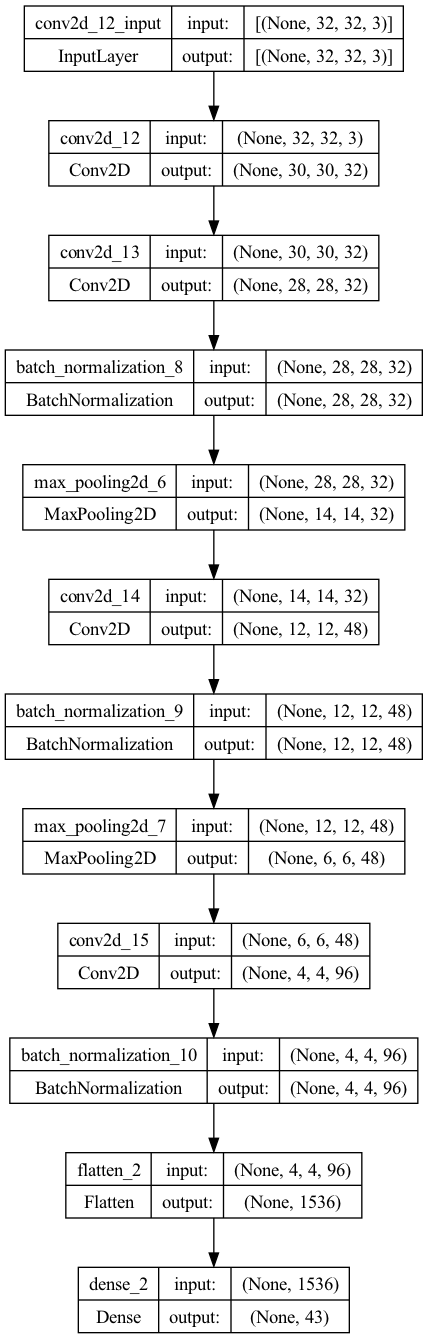

In [44]:
# plot model
tf.keras.utils.plot_model(model_cnn_hp_tuned, show_shapes=True)

In [44]:
# train model with best hyperparameters

history = model_cnn_hp_tuned.fit(train_augmented_labels['features'], train_augmented_labels['labels'], 
                    epochs=100,
                    validation_data=(valid_labels['features'], valid_labels['labels']),
                    callbacks=[lr_schedule, early_stopping])

Epoch 1/100
2701/2701 [==============================] - 152s 55ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.0991 - val_accuracy: 0.9789 - lr: 0.0010
Epoch 2/100
2701/2701 [==============================] - 149s 55ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0675 - val_accuracy: 0.9834 - lr: 9.0000e-04
Epoch 3/100
2701/2701 [==============================] - 148s 55ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0808 - val_accuracy: 0.9828 - lr: 8.1000e-04
Epoch 4/100
2701/2701 [==============================] - 147s 54ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0609 - val_accuracy: 0.9873 - lr: 7.2900e-04
Epoch 5/100
2701/2701 [==============================] - 148s 55ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0896 - val_accuracy: 0.9780 - lr: 6.5610e-04
Epoch 6/100
2701/2701 [==============================] - 149s 55ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0482 - val_accuracy: 0.9905 - lr: 5.9049e-04
Epoch 7/100
27

Speichern des Modells als cnn_hp_tuned.p

In [45]:
# safe model in pickle
import pickle

with open('../modelscnn_hp_tuned.p', 'wb') as f:
    pickle.dump(model_cnn_hp_tuned, f)

395/395 [==============================] - 4s 10ms/step
395/395 - 4s - loss: 0.1200 - accuracy: 0.9762 - 4s/epoch - 10ms/step
Test accuracy:  0.9762413875029698
Test loss:  0.12002147734165192
Test error:  0.02375859022140503
Precision:  0.9763941054099624
Recall:  0.9762413875029698
F1-Score:  0.9758188363451644


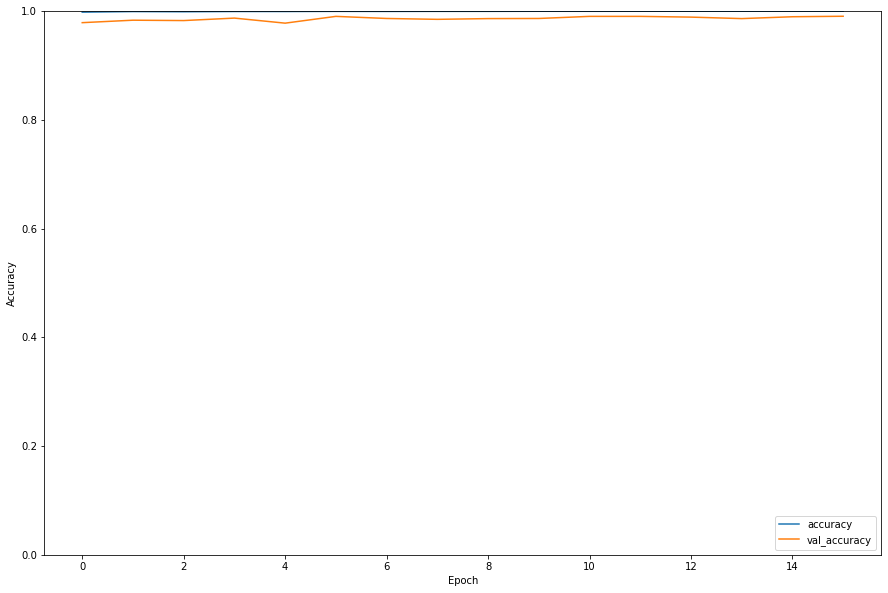

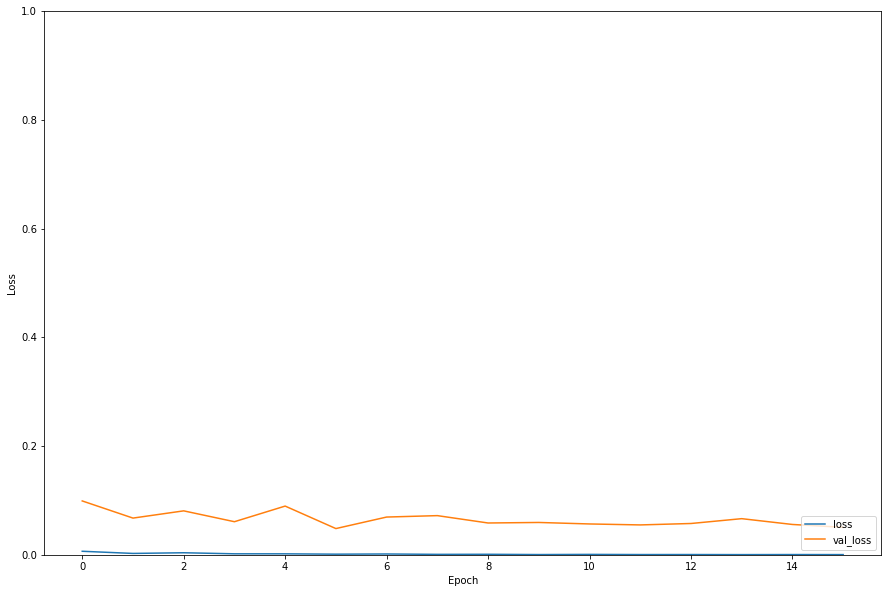

(array([16,  1, 38, ..., 38,  7, 10]),
 array([0.99999756, 0.99999994, 0.99999994, ..., 0.786803  , 0.99999964,
        0.9999752 ], dtype=float32))

In [46]:
# evaluate model performance 
predictions, predictions_probability, log = evaluate_deep_learning_model(model_cnn_hp_tuned, 'model_cnn_hp_tuned', test_labels['features'], test_labels['labels'])

***

<a id="TransferLearning"></a>

# 8. Transfer Learning: Evaluierung von pre-trained Models 

<a id="ViT"></a>

## 8.1 Vision Transformer Model

**Implement Vision Transformer**<p>
Code base: [Kaggle](https://www.kaggle.com/code/codenamekash/image-classification-with-vision-transformer)

In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install vit-keras
!pip install -U tensorflow-addons

  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/37/0d/dc555976a792c6b2f6539de2f38fc73042ccd4705788922ad10f245a94d8/tensorflow_addons-0.21.0-cp39-cp39-macosx_10_14_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 4.4 MB/s eta 0:00:0000:0100:01m


In [45]:
# set parameters for ViT model - mostly standard values from tutorial
IMAGE_SIZE = 32
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = IMAGE_SIZE 
patch_size = 6  
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  
transformer_layers = 8 #8
mlp_head_units = [2048, 1024] 

num_classes = 43

IMAGE_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,3)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [46]:
import keras
def data_augmentation(inputs):
    augmented = layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE)(inputs)
    augmented = layers.experimental.preprocessing.Normalization()(augmented)
    return augmented

In [47]:
from vit_keras import vit

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)

    augmented = data_augmentation(inputs)

    pre_trained_model = vit.vit_l32(
        image_size=IMAGE_SIZE,
        activation='sigmoid',
        pretrained=True,
        include_top=True,
        pretrained_top=True,
        classes=num_classes
    )
    pre_trained_model.trainable = False
    features = pre_trained_model(augmented)
    features = layers.Dense(512, activation=layers.PReLU())(features)
    features = layers.Dropout(0.2)(features)
    features = layers.Dense(256, activation=layers.PReLU())(features)
    features = layers.Dropout(0.2)(features)
    features = layers.Dense(128, activation=layers.PReLU())(features)
    features = layers.Dropout(0.2)(features)

    outputs = layers.Dense(num_classes, activation="softmax")(features)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model

/usr/local/anaconda3/envs/tf_env/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [14]:
from keras.utils import to_categorical

# transform labels into one-hot encoded format, since this is the needed fromat for the model
train_labels_one_hot = to_categorical(train_augmented_labels['labels'], num_classes)
validation_labels_one_hot = to_categorical(valid_labels['labels'], num_classes)
test_labels_one_hot = to_categorical(test_labels['labels'], num_classes)

/Users/marenabele/opt/anaconda3/envs/nak_ml/lib/python3.9/site-packages/vit_keras/vit.py:139: UserWarning: Can only use pretrained_top with imagenet21k+imagenet2012 if classes = 1000. Setting manually.
  warnings.warn(
/Users/marenabele/opt/anaconda3/envs/nak_ml/lib/python3.9/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 1, 1
  warnings.warn(


Epoch 1/100
338/338 [==============================] - 798s 2s/step - loss: 3.8161 - accuracy: 0.0238 - top-2-accuracy: 0.0470 - val_loss: 3.7584 - val_accuracy: 0.0136 - val_top-2-accuracy: 0.0476
Epoch 2/100
338/338 [==============================] - 703s 2s/step - loss: 10.4726 - accuracy: 0.0232 - top-2-accuracy: 0.0454 - val_loss: 3.8046 - val_accuracy: 0.0204 - val_top-2-accuracy: 0.0272
Epoch 3/100
338/338 [==============================] - 693s 2s/step - loss: 3.7830 - accuracy: 0.0236 - top-2-accuracy: 0.0468 - val_loss: 3.7578 - val_accuracy: 0.0340 - val_top-2-accuracy: 0.0503
Epoch 4/100
338/338 [==============================] - 698s 2s/step - loss: 3.7709 - accuracy: 0.0230 - top-2-accuracy: 0.0459 - val_loss: 3.7896 - val_accuracy: 0.0136 - val_top-2-accuracy: 0.0272
Epoch 5/100
338/338 [==============================] - 698s 2s/step - loss: 3.7688 - accuracy: 0.0234 - top-2-accuracy: 0.0470 - val_loss: 3.7670 - val_accuracy: 0.0109 - val_top-2-accuracy: 0.0340
Epoch 6/1

/Users/marenabele/opt/anaconda3/envs/nak_ml/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


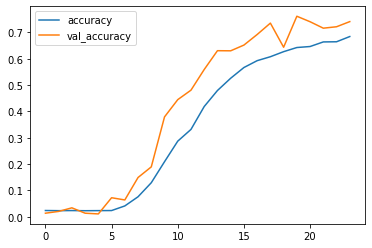

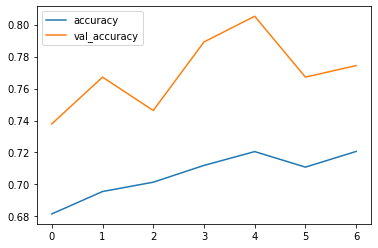

In [22]:
def run_experiment(model):
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
            keras.metrics.TopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)
    history = model.fit(
        train_augmented_labels['features'], 
        train_labels_one_hot,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(valid_labels['features'], validation_labels_one_hot),
        callbacks=[checkpoint_callback,early_stopping],
    )
    pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()
    
    model.trainable = True
    history = model.fit(
        train_augmented_labels['features'], 
        train_labels_one_hot,
        batch_size=batch_size,
        epochs=num_epochs // 2,
        validation_data=(valid_labels['features'], validation_labels_one_hot),
        callbacks=[checkpoint_callback,early_stopping],
    )
    
    model.load_weights(checkpoint_filepath)
    
    _, accuracy, top_2_accuracy = model.evaluate(test_labels['features'], test_labels_one_hot)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 2 accuracy: {round(top_2_accuracy * 100, 2)}%")
    
    pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()
    model.save("../models/vit_model.h5")
    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

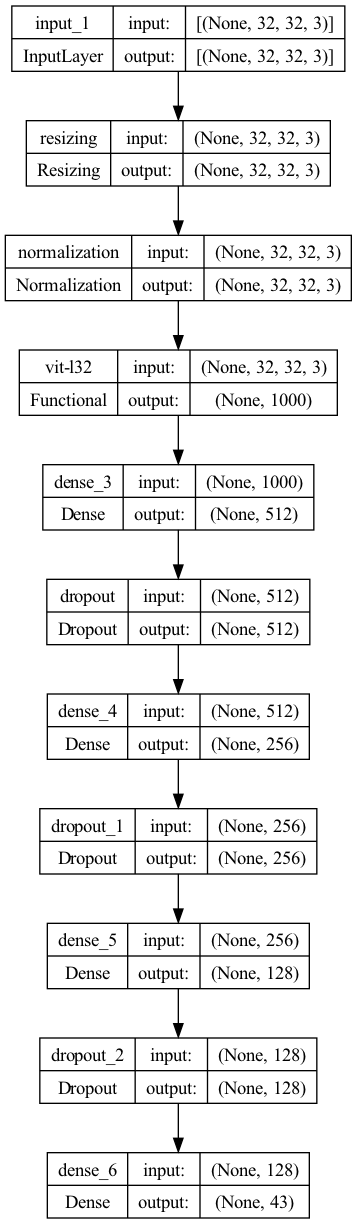

In [49]:
# plot model
tf.keras.utils.plot_model(vit_classifier, show_shapes=True)

Speichern des Modells als vit_classifier.p

In [31]:
# safe model in pickle
import pickle

with open('../models/vit_classifier.p', 'wb') as f:
    pickle.dump(vit_classifier, f)

In [32]:
# evaluate model
def evaluate_deep_learning_model_one_hot(model, name, test_data, test_labels):

    # make predictions
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_data)

    predictions = np.argmax(predictions, axis=1) # to get the predicted class

    # Calculate classification metrics
    true_labels_single = np.argmax(test_labels, axis=1)  # Convert one-hot to single-label format

    print("Test accuracy: ", accuracy_score(true_labels_single, predictions))
    acc =  accuracy_score(true_labels_single, predictions)

    print("Precision: ", precision_score(true_labels_single, predictions, average='weighted'))
    prec = precision_score(true_labels_single, predictions, average='weighted')

    print("Recall: ", recall_score(true_labels_single, predictions, average='weighted'))
    recall = recall_score(true_labels_single, predictions, average='weighted')

    print("F1-Score: ", f1_score(true_labels_single, predictions, average='weighted'))
    f1 = f1_score(true_labels_single, predictions, average='weighted')

    log_entry = pd.DataFrame([[name, acc*100, prec, recall, f1]], columns=log_cols)    

    # add to df
    log = pd.concat([log, log_entry], ignore_index=True)

    # plot accuracy and loss over epochs
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, max(history.history['loss'])])
    plt.legend(loc='lower right')
    plt.show()

    return predictions, predictions_probability, log


predictions, predictions_probability, log = evaluate_deep_learning_model_one_hot(vit_classifier, 'vit_classifier', test_labels['features'], test_labels_one_hot)


395/395 [==============================] - 333s 812ms/step
Test accuracy:  0.792112140650986
Precision:  0.8366299313678955
Recall:  0.792112140650986
F1-Score:  0.7973485340317075


NameError: name 'name' is not defined

<a id="Netv2l"></a>

## 8.2 EfficientNetV2L

In [6]:
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
v2l_base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(32,32,3))

# add a global spatial average pooling layer
x = v2l_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# and a logistic layer
predictions = Dense(43, activation='softmax')(x)

# this is the model to train
v2l_model = Model(inputs=v2l_base_model.input, outputs=predictions)

v2l_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 16, 16, 32)           864       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 16, 16, 32)           128       ['stem_conv[0][0]']           
 n)                                                                                           

In [50]:
# plot model
#tf.keras.utils.plot_model(vit_classifier, show_shapes=True) outcommented because output is too large

In [7]:
# Step one: Train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in v2l_base_model.layers:
    layer.trainable = False

# compile the model
v2l_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
v2l_model.fit(train_augmented_labels['features'], train_labels_one_hot, epochs=12, batch_size=2000, validation_data=(valid_labels['features'], validation_labels_one_hot))


for i, layer in enumerate(v2l_base_model.layers):
   print(i, layer.name)

for layer in v2l_model.layers[:249]:
   layer.trainable = False

for layer in v2l_model.layers[249:]:
   layer.trainable = True


from tensorflow.keras.optimizers import SGD
v2l_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# add callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("../models/EfficientNetV2L.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

v2l_model.fit(train_augmented_labels['features'], train_labels_one_hot, epochs=100, batch_size=32, validation_data=(valid_labels['features'], validation_labels_one_hot), callbacks=[checkpoint, early])

Epoch 1/12
44/44 [==============================] - 427s 9s/step - loss: 3.7481 - val_loss: 3.6637
Epoch 2/12
44/44 [==============================] - 380s 9s/step - loss: 3.6277 - val_loss: 3.5219
Epoch 3/12
44/44 [==============================] - 387s 9s/step - loss: 3.5168 - val_loss: 3.3470
Epoch 4/12
44/44 [==============================] - 408s 9s/step - loss: 3.4150 - val_loss: 3.2547
Epoch 5/12
44/44 [==============================] - 400s 9s/step - loss: 3.3421 - val_loss: 3.2710
Epoch 6/12
44/44 [==============================] - 377s 9s/step - loss: 3.2730 - val_loss: 3.1742
Epoch 7/12
44/44 [==============================] - 383s 9s/step - loss: 3.2056 - val_loss: 3.1159
Epoch 8/12
44/44 [==============================] - 381s 9s/step - loss: 3.1550 - val_loss: 3.3564
Epoch 9/12
44/44 [==============================] - 393s 9s/step - loss: 3.1220 - val_loss: 3.0176
Epoch 10/12
44/44 [==============================] - 378s 9s/step - loss: 3.0779 - val_loss: 2.8975
Epoch 11/

Epoch 1/100
2701/2701 [==============================] - ETA: 0s - loss: 0.6070
Epoch 1: val_loss improved from inf to 0.48723, saving model to ../models/EfficientNetV2L.h5


/Users/marenabele/opt/anaconda3/envs/nak_ml/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2701/2701 [==============================] - 8141s 3s/step - loss: 0.6070 - val_loss: 0.4872
Epoch 2/100
2701/2701 [==============================] - ETA: 0s - loss: 0.1088
Epoch 2: val_loss improved from 0.48723 to 0.43816, saving model to ../models/EfficientNetV2L.h5
2701/2701 [==============================] - 8081s 3s/step - loss: 0.1088 - val_loss: 0.4382
Epoch 3/100
2701/2701 [==============================] - ETA: 0s - loss: 0.0597
Epoch 3: val_loss did not improve from 0.43816
2701/2701 [==============================] - 8073s 3s/step - loss: 0.0597 - val_loss: 0.4682
Epoch 4/100
2701/2701 [==============================] - ETA: 0s - loss: 0.0412
Epoch 4: val_loss improved from 0.43816 to 0.43745, saving model to ../models/EfficientNetV2L.h5
2701/2701 [==============================] - 8040s 3s/step - loss: 0.0412 - val_loss: 0.4375
Epoch 5/100
2701/2701 [==============================] - ETA: 0s - loss: 0.0293
Epoch 5: val_loss did not improve from 0.43745
2701/2701 [=========

Speichern des Models als v2l_model.p

In [25]:
# safe model in pickle
import pickle

with open('../models/v2l_model.p', 'wb') as f:
    pickle.dump(v2l_model, f)

In [29]:
# evaluate model performance 
predictions, predictions_probability, log = evaluate_deep_learning_model_one_hot(v2l_model, 'v2l_model', test_labels['features'], test_labels_one_hot)

395/395 [==============================] - 123s 288ms/step
Test accuracy:  0.8690108497663737
Precision:  0.8802913482161778
Recall:  0.8690108497663737
F1-Score:  0.868484099194818


NameError: name 'name' is not defined

# Übersicht über die Model-Performances

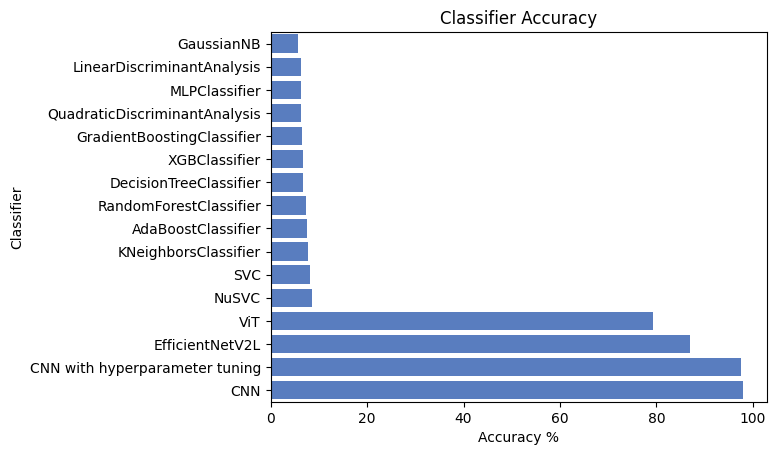

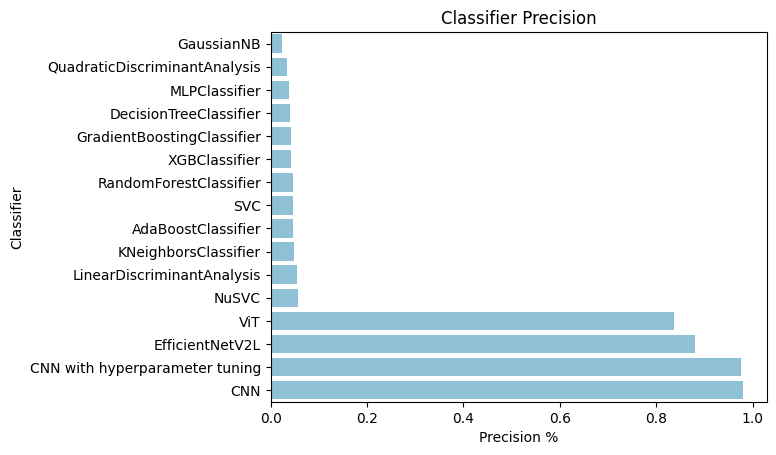

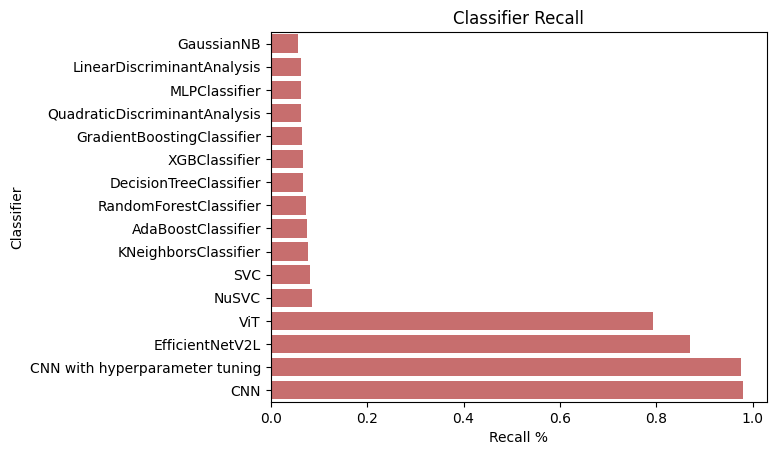

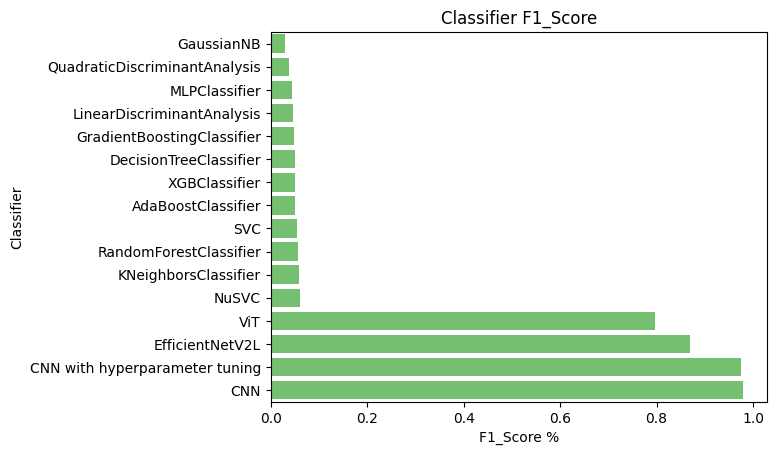

In [53]:
# Sort values
log_sorted_acc = log.sort_values(by=['Accuracy'])
log_sorted_pre = log.sort_values(by=['Precision'])
log_sorted_rec = log.sort_values(by=['Recall'])
log_sorted_f1 = log.sort_values(by=['F1_Score'])


import seaborn as sns

#Accuracy Plot
sns.set_color_codes("muted")
ax =sns.barplot(x='Accuracy', y='Classifier', data=log_sorted_acc, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


#Precision Plot
sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log_sorted_pre, color="c")

plt.xlabel('Precision %')
plt.title('Classifier Precision')
plt.show()

# Recall Plot
sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log_sorted_rec, color="r")

plt.xlabel('Recall %')
plt.title('Classifier Recall')
plt.show()


#F1_Score Plot
sns.set_color_codes("muted")
sns.barplot(x='F1_Score', y='Classifier', data=log_sorted_f1, color="g")

plt.xlabel('F1_Score %')
plt.title('Classifier F1_Score')
plt.show()

# Class Activation Maps (CAM)

In [36]:
# Load our best model for the GUI
import pickle
model_cnn = pickle.load(open('../models/cnn.p', 'rb'))

DISCLAIMER: Der folgende Abschnitt wurde zusammen mit ChatGPT geschrieben

1/1 [==============================] - 0s 23ms/step


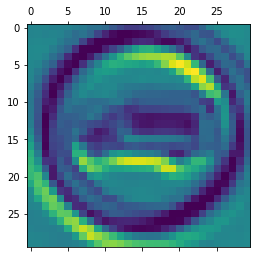

In [41]:
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions


def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def cam_picture(img_array, model, target_size=(32, 32)):
    img_array = tf.image.resize(img_array, target_size)

    img_array = np.expand_dims(img_array, axis=0)

    # Remove last layer's softmax
    model.layers[-1].activation = None

    preds = model.predict(img_array)
    
    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d')

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()
    return heatmap
heatmap = cam_picture(test_labels['features'][0], model_cnn)

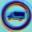

In [42]:
from matplotlib import cm
from PIL import Image
from IPython.display import display, Image as IPImage

def save_and_display_gradcam(img_array, heatmap, cam_path="cam.jpg", alpha=0.4, display_size=(1200, 1200)):
    target_size=(32, 32)
    
    # Resize the input image to the target size
    img_array = tf.image.resize(img_array, target_size)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array.shape[1], img_array.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_array
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # load image
    img = Image.open(cam_path)

    # display image larger
    display(IPImage(filename=cam_path, width=display_size[0], height=display_size[1]))

save_and_display_gradcam(test_labels['features'][0], heatmap, display_size=(600, 600))

## GUI

In [43]:
# https://www.analyticsvidhya.com/blog/2021/12/traffic-signs-recognition-using-cnn-and-keras-in-python/ + https://www.geeksforgeeks.org/load-csv-data-into-list-and-dictionary-using-python/
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np

#load the trained model to classify sign
from keras.models import load_model

In [44]:
# Load our best model for the GUI
import pickle
best_cnn_model = pickle.load(open('../models/cnn.p', 'rb'))


In [45]:
# create dict of ids and names of traffic signs
import pandas as pd
signnames_df = pd.read_csv('../data/signname.csv')
signnames_dict = dict(zip(signnames_df['ClassId'], signnames_df['SignName']))

In [48]:
# creating the GUI
top=tk.Tk()
top.geometry('800x600')
top.title("Veranschaulichung unseres Modells - Klassifizierung von Verkehrsschildern")
top.configure(background='#818E93')
label=Label(top,background='#818E93', font=('arial',18,'bold'))
sign_image = Label(top)

# Create a label to display the classification result
classification_result = Label(top, text="", background='#818E93', foreground="#F3503F", font=('arial', 16, 'bold', ))
classification_result.pack(side=tk.TOP, pady=20)

def classify(file_path):
   global label_packed
   image = Image.open(file_path)
   image = image.resize((32,32))
   image = np.expand_dims(image, axis=0)
   image = np.array(image)
   pred = best_cnn_model.predict([image])[0]
   sign = signnames_dict[int(pred[0])]
   print(sign)
   classification_result.configure(text=f"Das Verkehrsschild wurde vom Model als: {sign} klassifiziert.")

def show_classify_button(file_path):
   classify_b=Button(top,text="Bild klassifizieren",command=lambda: classify(file_path),padx=10,pady=5)
   classify_b.configure(background='#818E93', foreground='#7B104B',font=('arial',12,'bold'))
   classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        upload_img=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=upload_img)
        sign_image.image=upload_img
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Bild von Verkehrsschild hochladen",command=upload_image,padx=10,pady=5)
upload.configure(background='#818E93', foreground='#7B104B',font=('arial',12,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Lassen Sie ein Verkehrsschild überprüfen",pady=20, font=('arial',20,'bold'))
heading.configure(background='#818E93',foreground='#7B104B')
heading.pack()
top.mainloop()

upload=Button(top,text="Bild von Verkehrsschild hochladen",command=upload_image,padx=10,pady=5)
upload.configure(background='#818E93', foreground='#7B104B',font=('arial',12,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Lassen Sie ein Verkehrsschild überprüfen",pady=20, font=('arial',20,'bold'))
heading.configure(background='#818E93',foreground='#7B104B')
heading.pack()
top.mainloop()

2023-09-10 19:29:07.323 python[43854:1034043] +[CATransaction synchronize] called within transaction
2023-09-10 19:29:07.421 python[43854:1034043] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 35ms/step
Speed limit (60km/h)


2023-09-10 19:29:13.700 python[43854:1034043] +[CATransaction synchronize] called within transaction
2023-09-10 19:29:13.780 python[43854:1034043] +[CATransaction synchronize] called within transaction
2023-09-10 19:29:13.784 python[43854:1034043] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 38ms/step
Speed limit (60km/h)
1/1 [==============================] - 0s 37ms/step
Speed limit (60km/h)
1/1 [==============================] - 0s 24ms/step
Speed limit (60km/h)


2023-09-10 19:29:33.404 python[43854:1034043] +[CATransaction synchronize] called within transaction
2023-09-10 19:29:33.496 python[43854:1034043] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 53ms/step
Speed limit (50km/h)


2023-09-10 19:29:41.786 python[43854:1034043] +[CATransaction synchronize] called within transaction
2023-09-10 19:29:41.862 python[43854:1034043] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 26ms/step
Speed limit (20km/h)


2023-09-10 19:29:46.879 python[43854:1034043] +[CATransaction synchronize] called within transaction
2023-09-10 19:29:46.971 python[43854:1034043] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 29ms/step
Speed limit (20km/h)
1/1 [==============================] - 0s 21ms/step
Speed limit (20km/h)


TclError: can't invoke "button" command: application has been destroyed